In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from physicochem_properties_for_pca import *

## Drug bank

In [2]:
'''
Drug bank approved drugs were used as background
'''
from rdkit.Chem import PandasTools as rpd

fn = '/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures.sdf'

drugbank_bg = rpd.LoadSDF(fn, embedProps=True, molColName=None, smilesName='smiles')
drugbank_bg


RDKit ERROR: [14:18:25] Explicit valence for atom # 28 N, 4, is greater than permitted
RDKit ERROR: [14:18:25] ERROR: Could not sanitize molecule ending on line 327321
[14:18:25] Explicit valence for atom # 28 N, 4, is greater than permitted
[14:18:25] ERROR: Could not sanitize molecule ending on line 327321
RDKit WARNING: [14:18:26] WARNING: not removing hydrogen atom without neighbors
[14:18:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:18:26] WARNING: not removing hydrogen atom without neighbors
[14:18:26] WARNING: not removing hydrogen atom without neighbors


,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,smiles,SALTS
0,DB00006,drugbank,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,OIRCOABEOLEUMC-GEJPAHFPSA-N,C98H138N24O33,2180.2853,2178.985813062,37,293,...,DB00006,BTD00076; EXPT03302; BIOD00076; DB02351,approved; investigational,Bivalirudin,Bivalirudin; Bivalirudina; Bivalirudinum,Angiomax; Angiomax RTU; Angiox; Bivalirudin; B...,Angiox; Hirulog,,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,NaN
1,DB00007,drugbank,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,GFIJNRVAKGFPGQ-LIJARHBVSA-N,C59H84N16O12,1209.3983,1208.645462232,16,171,...,DB00007,BTD00009; BIOD00009,approved; investigational,Leuprolide,Leuprorelin; Leuprorelina; Leuproreline; Leupr...,Camcevi; Eligard; Fensolvi; Leuprolide Acetate...,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...,Leuprolide acetate; Leuprolide mesylate
2,DB00014,drugbank,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,BLCLNMBMMGCOAS-URPVMXJPSA-N,C59H84N18O14,1269.4105,1268.641439486,18,175,...,DB00014,BTD00113; BIOD00113,approved,Goserelin,Goserelin; Goserelina,Zoladex; Zoladex LA,NaN,[NO NAME],CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,Goserelin acetate
3,DB00027,drugbank,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,NDAYQJDHGXTBJL-MWWSRJDJSA-N,C96H135N19O16,1811.253,1810.033419343,16,266,...,DB00027,BTD00036; BIOD00036,approved,Gramicidin D,Bacillus brevis gramicidin D; Gramicidin; Gram...,Antibiotic Cream; Antibiotic Cream Plus Pain R...,Sofradex,,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,NaN
4,DB00035,drugbank,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,NFLWUMRGJYTJIN-PNIOQBSNSA-N,C46H64N14O12S2,1069.22,1068.426955905,15,138,...,DB00035,BTD00112; BTD00061; BIOD00112; BIOD00061,approved,Desmopressin,1-(3-mercaptopropionic acid)-8-D-arginine-vaso...,Apo-desmopressin; Bipazen; DDAVP Rhinal Tube; ...,Adiuretin; DesmoMelt,,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...,Desmopressin acetate; Desmopressin acetate anh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,DB16965,drugbank,CCNCC1=NC2=C(C(Cl)=CC(Cl)=C2O)C(=O)N1C,InChI=1S/C12H13Cl2N3O2/c1-3-15-5-8-16-10-9(12(...,LQNHWKHRUWSYBK-UHFFFAOYSA-N,C12H13Cl2N3O2,302.16,301.0384821,4,32,...,DB16965,NaN,approved; investigational,PBT-434,"5,7-dichloro-2-((ethylamino)methyl)-8-hydroxy-...",NaN,NaN,,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,PBT-434 Mesylate
2584,DB17083,drugbank,COC1=C(COC2=C(OC)C=C(F)C(=C2)N2C(=O)NC3=CSC(C(...,InChI=1S/C22H15F3N2O7S/c1-32-14-4-3-10(23)18(2...,BMAAMIIYNNPHAB-UHFFFAOYSA-N,C22H15F3N2O7S,508.42,508.055206494,7,50,...,DB17083,NaN,approved,Linzagolix,"3-(5-((2,3-difluoro-6-methoxyphenyl)methoxy)-2...",KLH-2109 Choline; Yselty,NaN,,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,Linzagolix choline
2585,DB17084,drugbank,[Gd+3].OCC(O)CNC(=O)CCC(N1CCN(CC2=CC=CC(CN(CC1...,InChI=1S/C35H57N7O15.Gd/c43-19-24(46)14-36-30(...,GNRQMLROZPOLDG-UHFFFAOYSA-K,C35H54GdN7O15,970.1,970.2919,19,112,...,DB17084,NaN,approved,Gadopiclenol,"(.alpha.3,.alpha.6,.alpha.9-tris(3-((2,3-dihyd...",Elucirem; Vueway,Elucirem,,O=C(CCC(C(=O)[O-])N1CCN(C(CCC(=O)NCC(O)CO)C(=O...,NaN
2586,DB17308,drugbank,CCCCCCCCCCCCN1CCCCCC1=O,InChI=1S/C18H35NO/c1-2-3-4-5-6-7-8-9-10-13-16-...,AXTGDCSMTYGJND-UHFFFAOYSA-N,C18H35NO,281.484,281.271864751,1,55,...,DB17308,NaN,approved,Laurocapram,1-dodecylazacycloheptan-2-one; 1-dodecylhexahy...,NaN,NaN,,CCCCCCCCCCCCN1CCCCCC1=O,NaN


In [3]:
drugbank_bg.dropna(subset = ['SMILES'],inplace=True)

In [4]:
len(drugbank_bg)

2587

In [5]:
drugbank_bg.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS'],
      dt

In [6]:
import rdkit
print(rdkit.__version__)
from rdkit import Chem
import pandas as pd
import matplotlib.pyplot as plt

import chembl_structure_pipeline
print(chembl_structure_pipeline.__version__)
from chembl_structure_pipeline import standardizer
import sys
sys.path.append('/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/')
from src import MoleculePreprocessor
from src.MoleculePreprocessor import MoleculePreprocessor
from src.MoleculePreprocessorExtended import MoleculePreprocessorExtended

from chembl_structure_pipeline.standardizer import standardize_mol

2021.03.2
1.1.0


In [7]:
mols = []
for mol in drugbank_bg.SMILES:
    rdkit_mol = Chem.MolFromSmiles(mol)
    mols.append(rdkit_mol)
mols
df_to_wash = pd.DataFrame(mols, columns=['molecules'])
print(len(df_to_wash))
df_to_wash.dropna(subset = ['molecules'],inplace=True)
print(len(df_to_wash))

RDKit ERROR: [14:18:25] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
RDKit ERROR: [14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:25] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
[14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:27] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
RDKit ERROR: [14:18:27] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=

2587
2582


RDKit ERROR: [14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit WARNING: [14:18:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:18:27] WARNING: not removing hydrogen atom without neighbors
[14:18:27] WARNING: not removing hydrogen atom without neighbors
[14:18:27] WARNING: not removing hydrogen atom without neighbors


RDKit INFO: [14:18:26] Initializing Normalizer
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalize

[14:18:26] Initializing Normalizer
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running No

RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKi

Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Runni

RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKit INFO: [14:18:27] Running Normalizer
RDKit INFO: [14:18:27] Running Uncharger
RDKi

alizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running N

RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKi

14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharger
[14:18:27] Running Normalizer
[14:18:27] Running Uncharge

RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKit INFO: [14:18:28] Running Uncharger
RDKit INFO: [14:18:28] Running Normalizer
RDKi

r
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncha

RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKi

 Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:28] Running Normalizer
[14:18:28] Running Uncharger
[14:18:

RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKit INFO: [14:18:29] Running Uncharger
RDKit INFO: [14:18:29] Running Normalizer
RDKi

ning Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] 

[14:18:29] WARNING: not removing hydrogen atom without neighbors
[14:18:29] WARNING: not removing hydrogen atom without neighbors


,molecules
0,
1,
2,
3,
4,

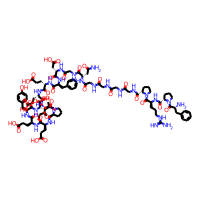
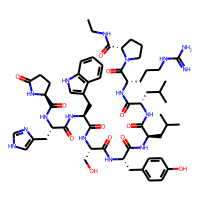
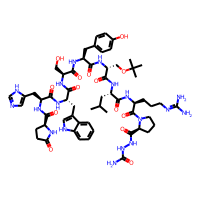
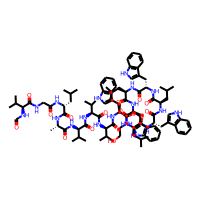
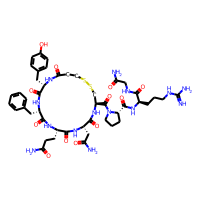

29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:18:29] Running Normalizer
[14:18:29] Running Uncharger
[14:

In [8]:
washed = []
for mol in df_to_wash.molecules:
    a = standardizer.standardize_mol(mol)
    washed.append(a)
washed
df_washed = pd.DataFrame(washed, columns=['molecules'])
df_washed.head(5)

In [9]:
moleculesProcessed = MoleculePreprocessorExtended.init_with_smiles(list(drugbank_bg.SMILES))


RDKit ERROR: [14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[14:18:30] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:18:30] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
RDKit ERROR: [14:18:30] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)

In [10]:
moleculesProcessed.csp_wash()
preprocessedSmilesDict = moleculesProcessed.get_rawsmiles_smiles_dict()

In [11]:
preprocessedSmiles_df = pd.DataFrame(list(preprocessedSmilesDict.items()),
                       columns=['rawSmiles','preprocessedSmiles'])

In [12]:
preprocessed_df = pd.merge(drugbank_bg, preprocessedSmiles_df, 
                           left_on='SMILES', right_on='rawSmiles')

In [13]:
preprocessed_df.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS', 'rawSmile

In [14]:
preprocessed_df[['SMILES', 'smiles', 'rawSmiles', 'preprocessedSmiles', 'MOLECULAR_WEIGHT']].head(5)

,SMILES,smiles,rawSmiles,preprocessedSmiles,MOLECULAR_WEIGHT
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,,2180.2853
1,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,,1209.3983
2,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,,1269.4105
3,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,,1811.253
4,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,,1069.22


In [15]:
preprocessed_df.dropna(subset=['preprocessedSmiles'],inplace=True) 

In [16]:
preprocessed_df = preprocessed_df[preprocessed_df['preprocessedSmiles']!='']

In [17]:
len(preprocessed_df)

1692

In [18]:
save_path = '/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures_preprocessed.csv'
preprocessed_df.to_csv(save_path, index=False)

## unify column names

In [19]:
pubchem_active = pd.read_csv('./../datasets/2_preprocessed/pubchem_preprocessed_active.csv')
pubchem_inactive = pd.read_csv('./../datasets/2_preprocessed/pubchem_preprocessed_inactive.csv')
chembl_active = pd.read_csv('./../datasets/2_preprocessed/chembl_preprocessed_active.csv')
chembl_inactive = pd.read_csv('./../datasets/2_preprocessed/chembl_preprocessed_inactive.csv')
tested = pd.read_csv('./../analysis/PCA_set/tested_smiles.csv')
drugbank = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures_preprocessed.csv') 

,index,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,O=[N+]([O-])c1ccc(C(c2cc3ccc(O)cc3o2)n2cncn2)cc1,CHEMBL202231,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,COc1ccc2cc(C(O)(c3ccc(Cl)cc3)c3cccnc3)oc2c1,CHEMBL202612,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2476,CC(=C(c1ccc(O)cc1)c1ccc(O)cc1)c1c[nH]cn1,CHEMBL5082681,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752,2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

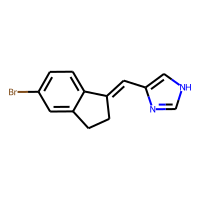
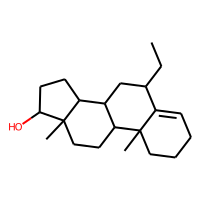
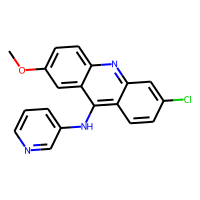
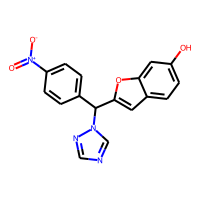
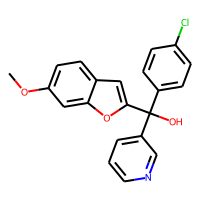
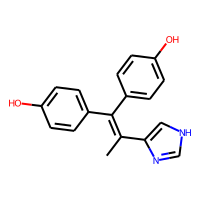
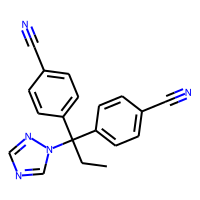
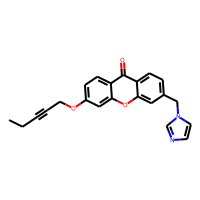
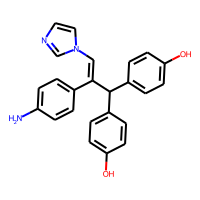
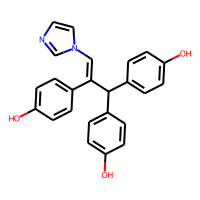

In [20]:
chembl_active

,index,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,COc1ccc(C(=NNc2cnnc(Cl)c2Cl)c2ccccc2)cc1,CHEMBL497614,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,COc1ccc2c(=O)c(-c3ccccc3)c(-n3cncn3)oc2c1,CHEMBL190099,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,COc1ccc2c(=O)c(-c3ccccc3)c(SCc3cccnc3)oc2c1,CHEMBL185819,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2468,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,CHEMBL5092843,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,2471,CC12CCC3C4=C(CCCC4)CC(=O)C3C1CCC2=O,CHEMBL71082,0,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,2474,COCOc1ccc2c(c1)OC(c1ccc(OCOC)c(CC=C(C)C)c1)CC2=O,CHEMBL229945,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2475,COc1ccc2c(c1)OC(c1ccc(O)c(CC=C(C)C)c1)CC2=O,CHEMBL388374,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

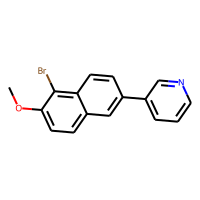
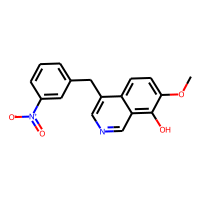
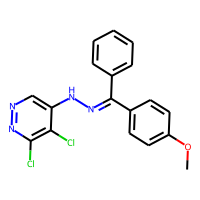
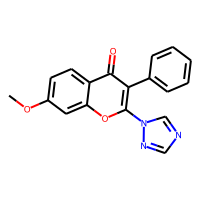
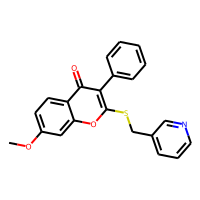
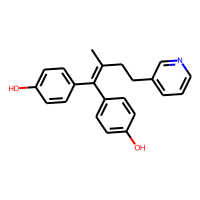
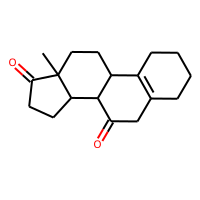
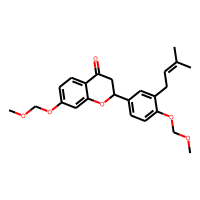
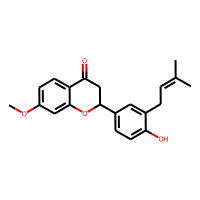
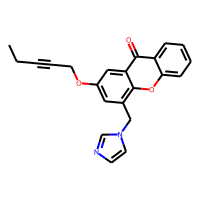

In [21]:
chembl_inactive

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Cc1oc2c(NC(=O)c3c(Cl)cccc3Cl)cccc2c1C(C)(C)O,144213666.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,144213678.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,Cc1[nH]nc2c1N=C(c1ccccc1Cl)c1cc([N+](=O)[O-])c...,144213825.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,CC(C)CC1C(=O)N2CCCC2C2(O)OC(NC(=O)C3=CC4c5cccc...,144213902.0,Active,,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

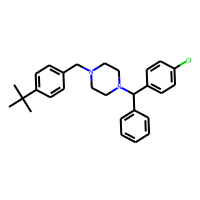
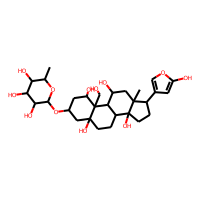
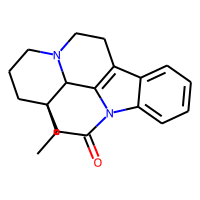
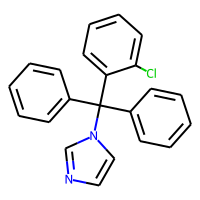
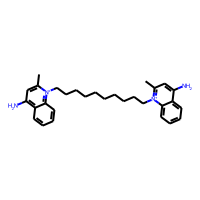
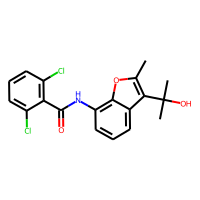
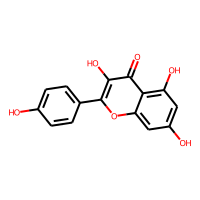
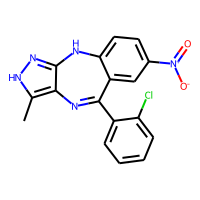
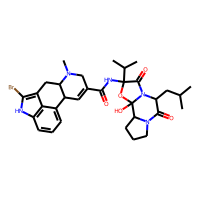
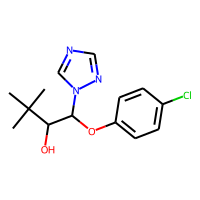

In [22]:
pubchem_active

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC12CCC3c4ccc(O)cc4CCC3C1CCC2OC(=O)CCC1CCCC1,144203554.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CC1(C)C2CCC1(C)C(OC(=O)CSC#N)C2,144203555.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21,144203563.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O[PH](=O)(=O)O,144203569.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,144203570.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2149,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2150,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

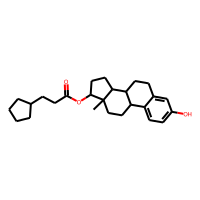
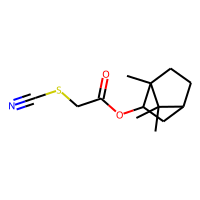
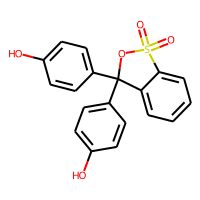
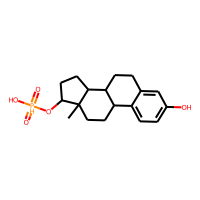
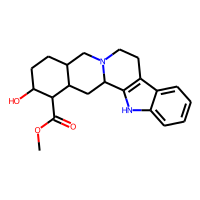
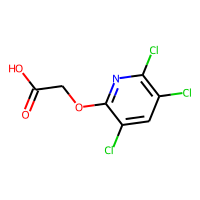
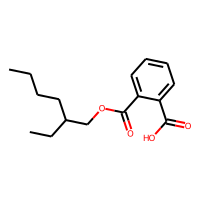
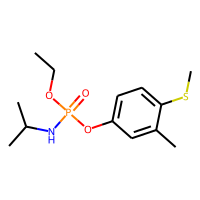
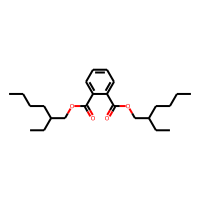
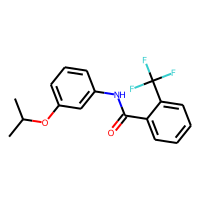

In [23]:
pubchem_inactive

In [24]:
tested.columns

Index(['preprocessedSmiles', 'MOLPORTID'], dtype='object')

In [25]:
drugbank.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS', 'rawSmile

In [26]:
chembl_active = chembl_active[['preprocessedSmiles']]
chembl_inactive = chembl_inactive[['preprocessedSmiles']]
pubchem_active = pubchem_active[['preprocessedSmiles']]
pubchem_inactive = pubchem_inactive[['preprocessedSmiles']]
tested = tested[['preprocessedSmiles']]
drugbank = drugbank[['preprocessedSmiles']]

In [27]:
chembl_active['label'] = 'ChEMBL (Active)'
chembl_inactive['label'] = 'ChEMBL (Inactive)'
pubchem_active['label'] = 'PubChem BioAssay (Active)'
pubchem_inactive['label'] = 'PubChem BioAssay (Inactive)'
tested['label'] = 'Tested compounds'
drugbank['label'] = 'DrugBank'


/tmp/ipykernel_407987/2010195031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_active['label'] = 'ChEMBL (Active)'
/tmp/ipykernel_407987/2010195031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_inactive['label'] = 'ChEMBL (Inactive)'
/tmp/ipykernel_407987/2010195031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

## calculate descriptors

In [28]:
get_physicochemical_properties(chembl_active,'preprocessedSmiles')
get_further_physicochemical_properties(chembl_active)
get_physicochemical_properties(chembl_inactive,'preprocessedSmiles')
get_further_physicochemical_properties(chembl_inactive)
get_physicochemical_properties(pubchem_active,'preprocessedSmiles')
get_further_physicochemical_properties(pubchem_active)
get_physicochemical_properties(pubchem_inactive,'preprocessedSmiles')
get_further_physicochemical_properties(pubchem_inactive)
get_physicochemical_properties(tested,'preprocessedSmiles')
get_further_physicochemical_properties(tested)
get_physicochemical_properties(drugbank,'preprocessedSmiles')
get_further_physicochemical_properties(drugbank)

/home/sliu/miniconda3/envs/cypscreen/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['N'] = molDF['Molecule'].apply(get_molecule_composition, args=(7,))


Start calculcating parameters.


/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['O'] = molDF['Molecule'].apply(get_molecule_composition, args=(8,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['chiral'] = molDF['Molecule'].apply(get_nof_chiral_centers)
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/anal

Start calculcating further properties.
Start calculcating parameters.


/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['N'] = molDF['Molecule'].apply(get_molecule_composition, args=(7,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['O'] = molDF['Molecule'].apply(get_molecule_composition, args=(8,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screen

Start calculcating further properties.
Start calculcating parameters.


/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['S'] = molDF['Molecule'].apply(get_molecule_composition, args=(16,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['nHalogens'] = molDF['Molecule'].apply(num_halogens)
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/.

Start calculcating further properties.
Start calculcating parameters.


/home/sliu/miniconda3/envs/cypscreen/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['N'] = molDF['Molecule'].apply(get_molecule_composition, args=(7,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem

Start calculcating further properties.


/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['S'] = molDF['Molecule'].apply(get_molecule_composition, args=(16,))
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/../src/physicochem_properties_for_pca.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molDF['nHalogens'] = molDF['Molecule'].apply(num_halogens)
/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/analysis/.

Start calculcating parameters.
Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.


## calculate PCA

In [29]:
dataframe = pd.concat([chembl_active, chembl_inactive, pubchem_active, pubchem_inactive, tested, drugbank], ignore_index=True)

In [30]:
dataframe.columns

Index(['preprocessedSmiles', 'label', 'Molecule', 'N', 'O', 'chiral', 'MW',
       'heavy_atoms', 'h_acc', 'h_don', 'logP', 'TPSA', 'numAro',
       'formalCharge', 'numRings', 'frac_csp3', 'S', 'nHalogens', 'MR'],
      dtype='object')

,preprocessedSmiles,label,Molecule,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,frac_csp3,S,nHalogens,MR
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,ChEMBL (Active),,2,0,0,275.149,16,1,1,3.659,28.68,11,0,3,0.154,0,1,68.922
1,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,ChEMBL (Active),,0,1,7,302.502,22,1,1,5.336,20.23,0,0,4,0.905,0,0,91.491
2,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,ChEMBL (Active),,3,1,0,335.794,24,4,1,5.189,47.04,20,0,4,0.053,0,1,98.331
3,O=[N+]([O-])c1ccc(C(c2cc3ccc(O)cc3o2)n2cncn2)cc1,ChEMBL (Active),,4,4,1,336.307,25,7,1,3.276,107.22,20,0,4,0.059,0,0,88.238
4,COc1ccc2cc(C(O)(c3ccc(Cl)cc3)c3cccnc3)oc2c1,ChEMBL (Active),,1,3,1,365.816,26,4,1,4.774,55.49,21,0,4,0.095,0,1,100.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,O=[PH](=O)(O)C(O)(Cn1ccnc1)[PH](=O)(=O)O,DrugBank,,2,7,0,272.090,16,7,3,-0.774,146.79,5,0,1,0.400,0,0,50.990
5411,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,DrugBank,,3,2,0,302.161,19,5,2,2.055,67.15,10,0,2,0.333,0,2,76.050
5412,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,DrugBank,,2,7,0,508.430,35,8,2,3.452,119.85,21,0,4,0.136,1,3,118.754
5413,O=C(CCC(C(=O)O)N1CCN(C(CCC(=O)NCC(O)CO)C(=O)O)...,DrugBank,,7,15,6,815.875,57,16,12,-4.890,343.19,6,0,2,0.686,0,0,196.910

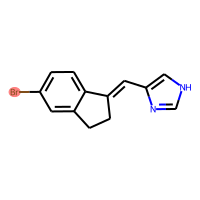
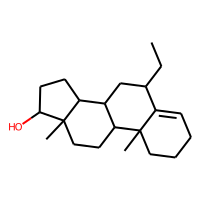
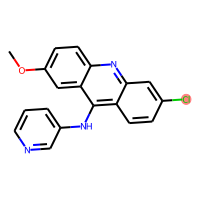
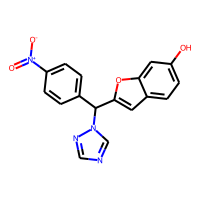
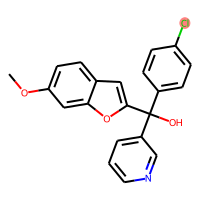
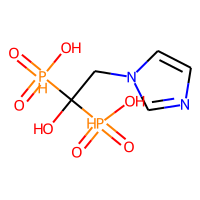
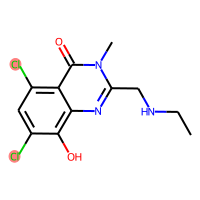
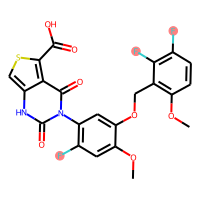
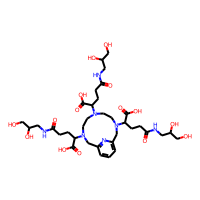
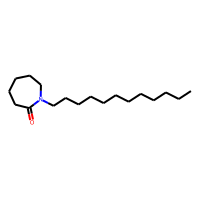

In [31]:
dataframe

In [32]:
featureList = []
for column in dataframe.columns:
    if column not in ['id', 'activity', 'preprocessedSmiles', 'label', 'Molecule', 'PUBCHEM_ACTIVITY_OUTCOME','pChEMBL Value', 'activity_classification' ]:
        featureList.append(column)

In [33]:
x = dataframe.loc[:, featureList].values
y = dataframe.loc[:, ['label']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

variance = pca.explained_variance_ratio_
principalDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

pcaDF = pd.concat([principalDF, dataframe[['label']], dataframe[['preprocessedSmiles']]], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=featureList)
print(loadings)

                   PC1       PC2
N             0.168885  0.206569
O             0.349785 -0.200852
chiral        0.245059 -0.248923
MW            0.356024  0.195225
heavy_atoms   0.360051  0.223155
h_acc         0.371367 -0.066765
h_don         0.300572 -0.200339
logP         -0.130931  0.360576
TPSA          0.373969 -0.123965
numAro        0.033510  0.503215
formalCharge  0.006869  0.040370
numRings      0.173217  0.310931
frac_csp3     0.079426 -0.370454
S             0.088924  0.060815
nHalogens    -0.048952  0.118369
MR            0.315665  0.265817


In [34]:
#plot_pca
def plot_pca(pcaDF,variance,databases,colors):
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.figsize'] = 5, 5
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=16)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=16)

    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['label'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=5,alpha=0.8)
    axes.legend(databases, fontsize=16, loc='upper left', scatterpoints=5)

    #plt.scatter(x, y, s=50)
    plt.tick_params(labelsize=14)
    #axes.set_xlim(left=-5.2, right=30.5)

    axes.set_yticks([-5,0,5,10,15])
    axes.set_xticks([-5,0,5,10,15])
    #axes.set_ylim(bottom=-11.5, top=37)
 
    plt.tight_layout()
#     if len(set(pcaDF.db))==2:
#         plt.savefig('../../../20210901_analysis/pca.png')
    plt.show()

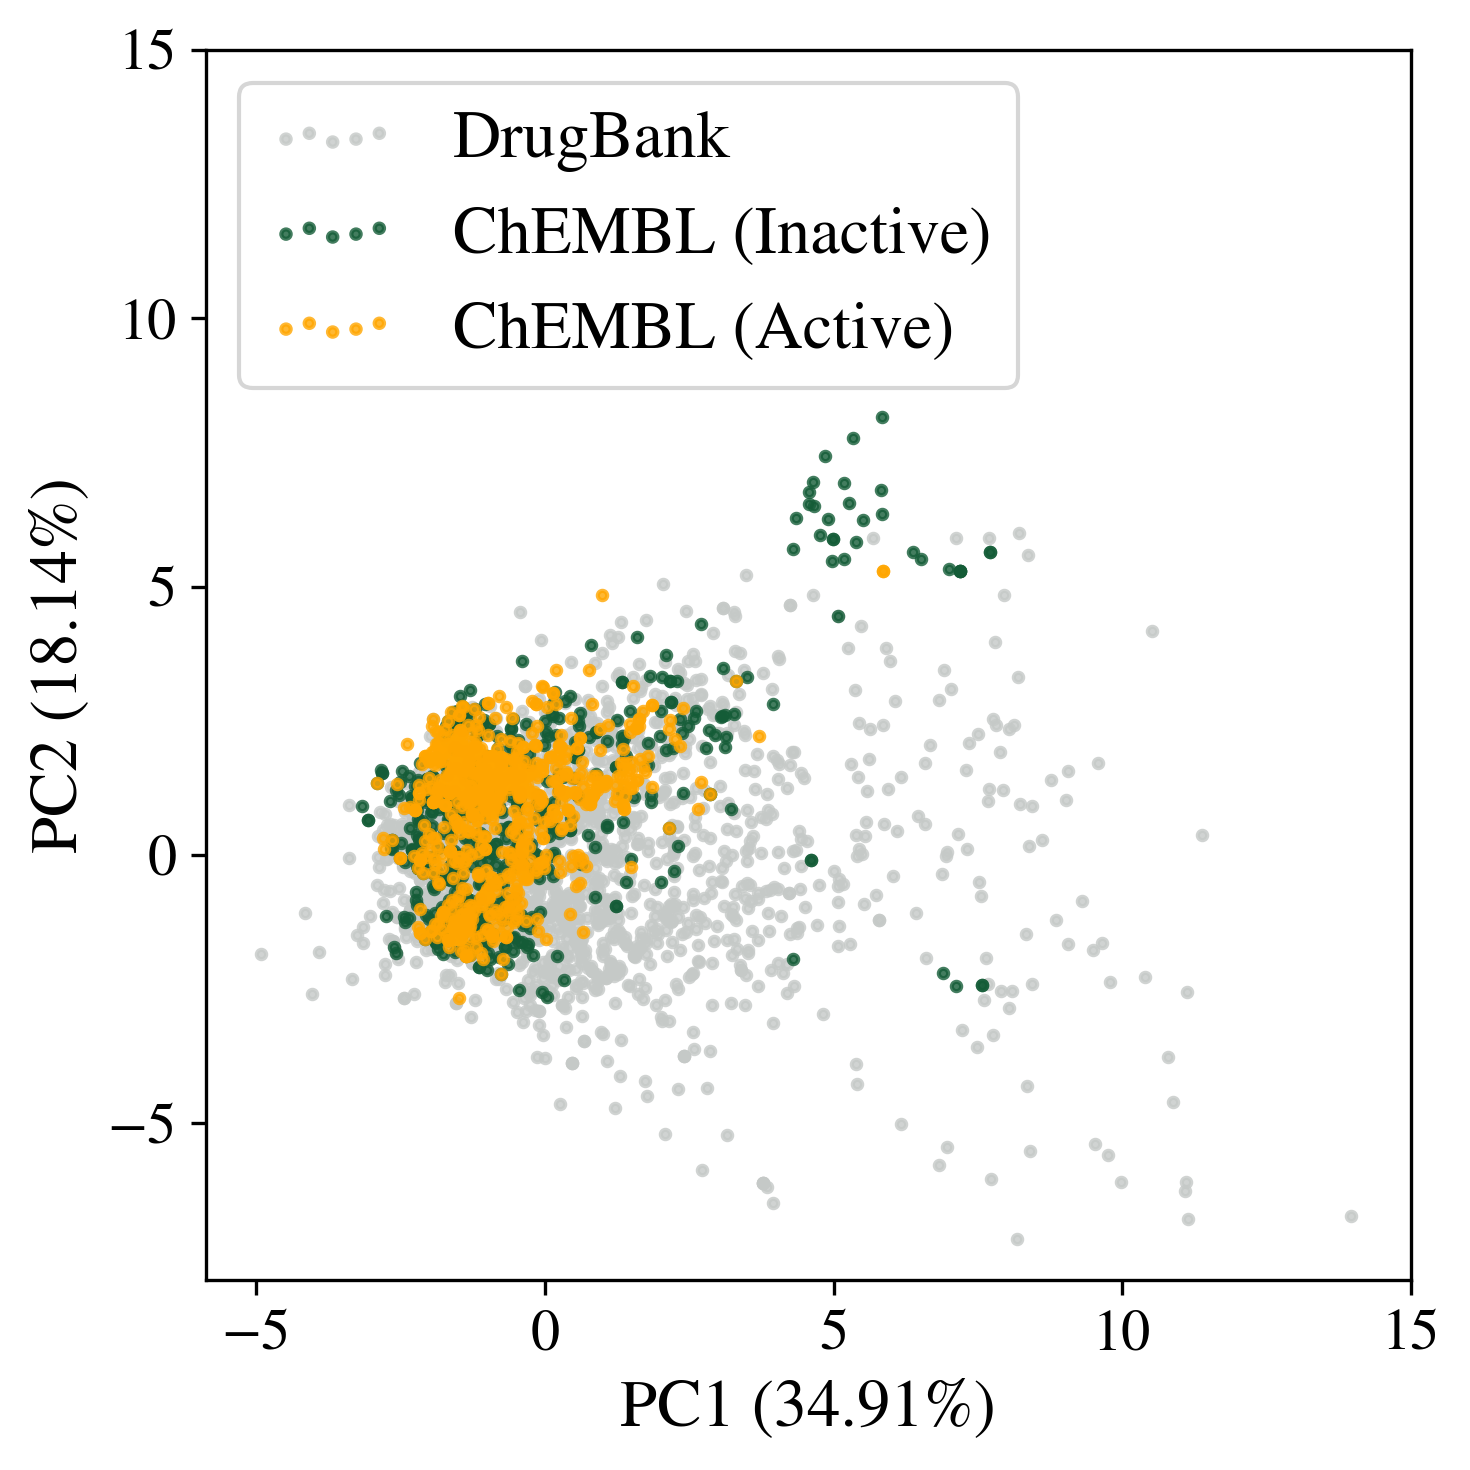

In [35]:
# Active and inactive compounds from ChEMBL, with drug bank as background
databases = ['DrugBank', 'ChEMBL (Inactive)', 'ChEMBL (Active)']#, 'PubChem BioAssay (Active)', 'PubChem BioAssay (Inactive)', 'Tested compounds']
colors = ['#c5c9c7', '#145c37', '#ffa600']#, '#800000', 'aqua', 'blue']

plot_pca(pcaDF,variance,databases,colors)

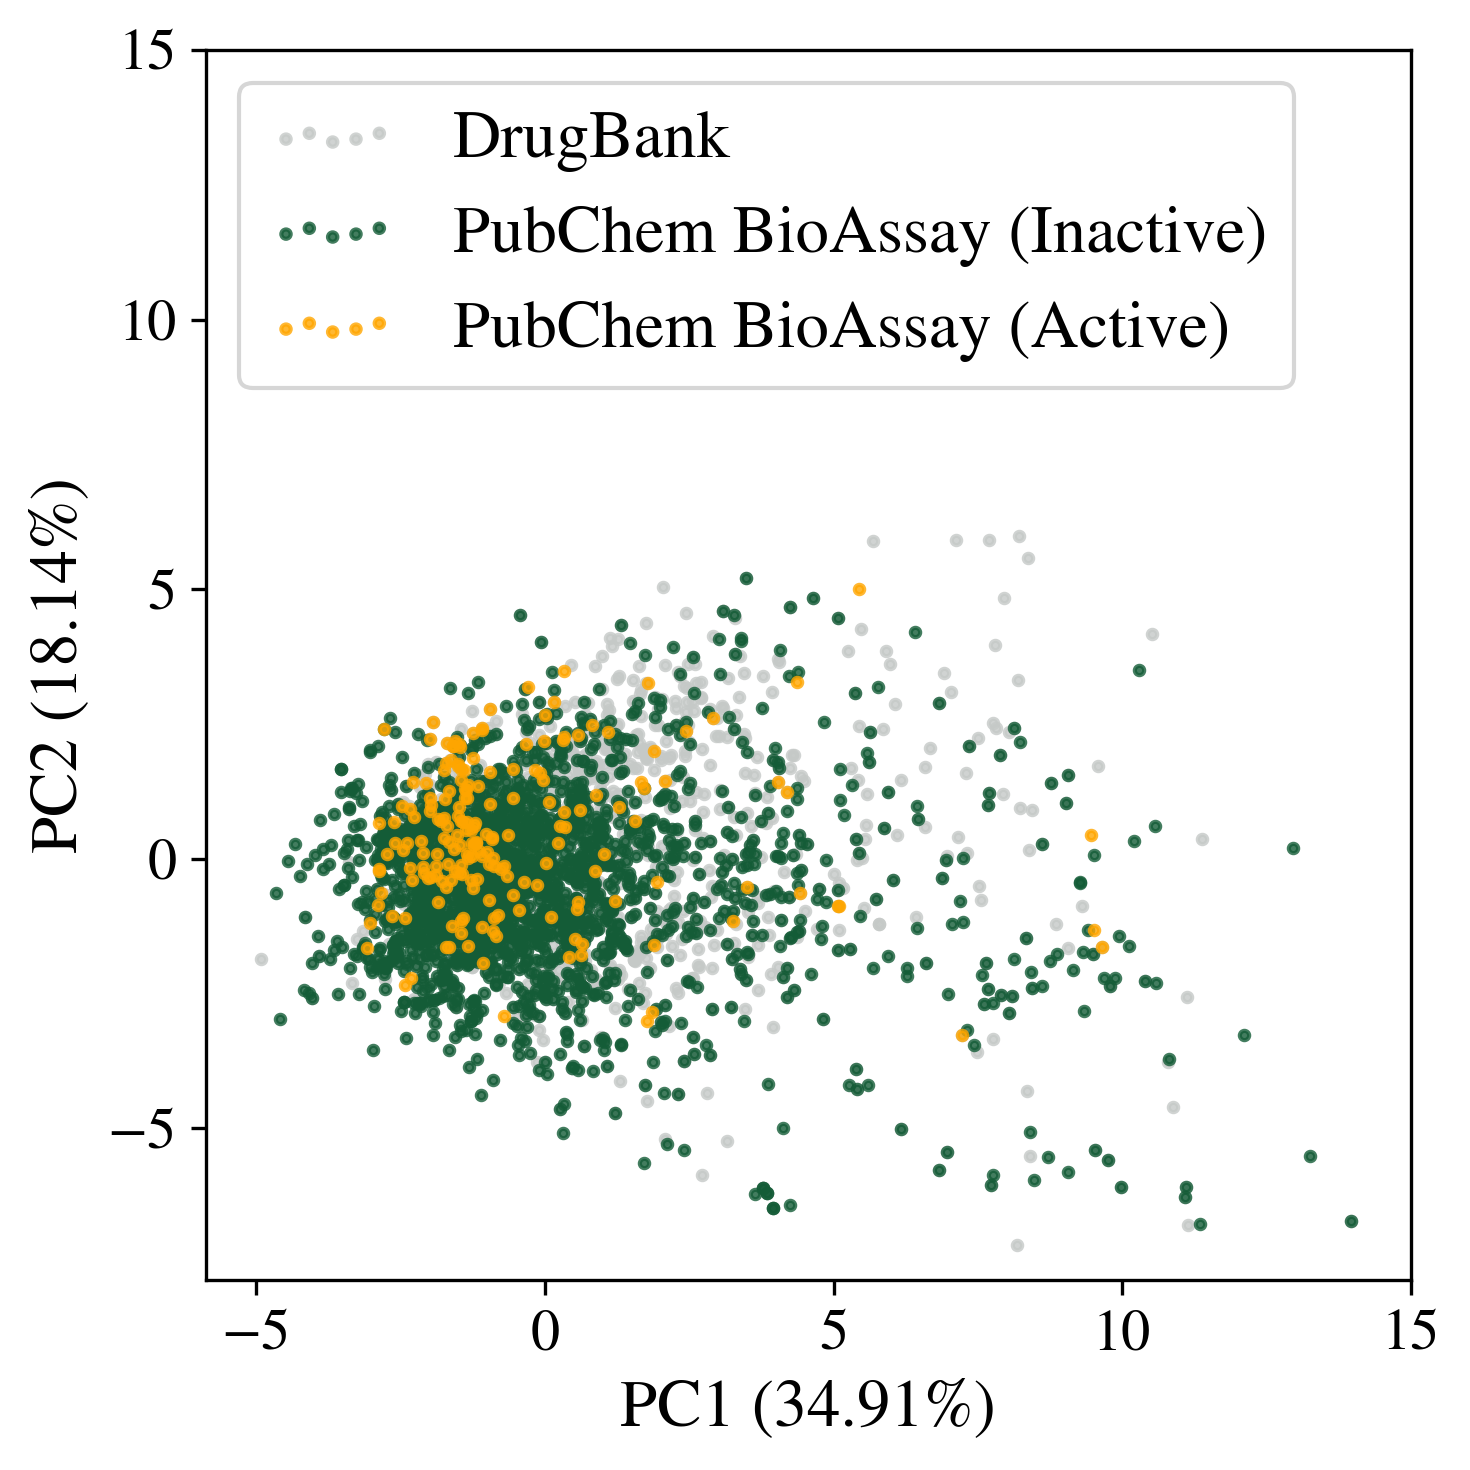

In [36]:
databases = ['DrugBank', 'PubChem BioAssay (Inactive)', 'PubChem BioAssay (Active)']#, 'DrugBank', 'Tested compounds']
colors =  ['#c5c9c7', '#145c37', '#ffa600']

plot_pca(pcaDF,variance,databases,colors)

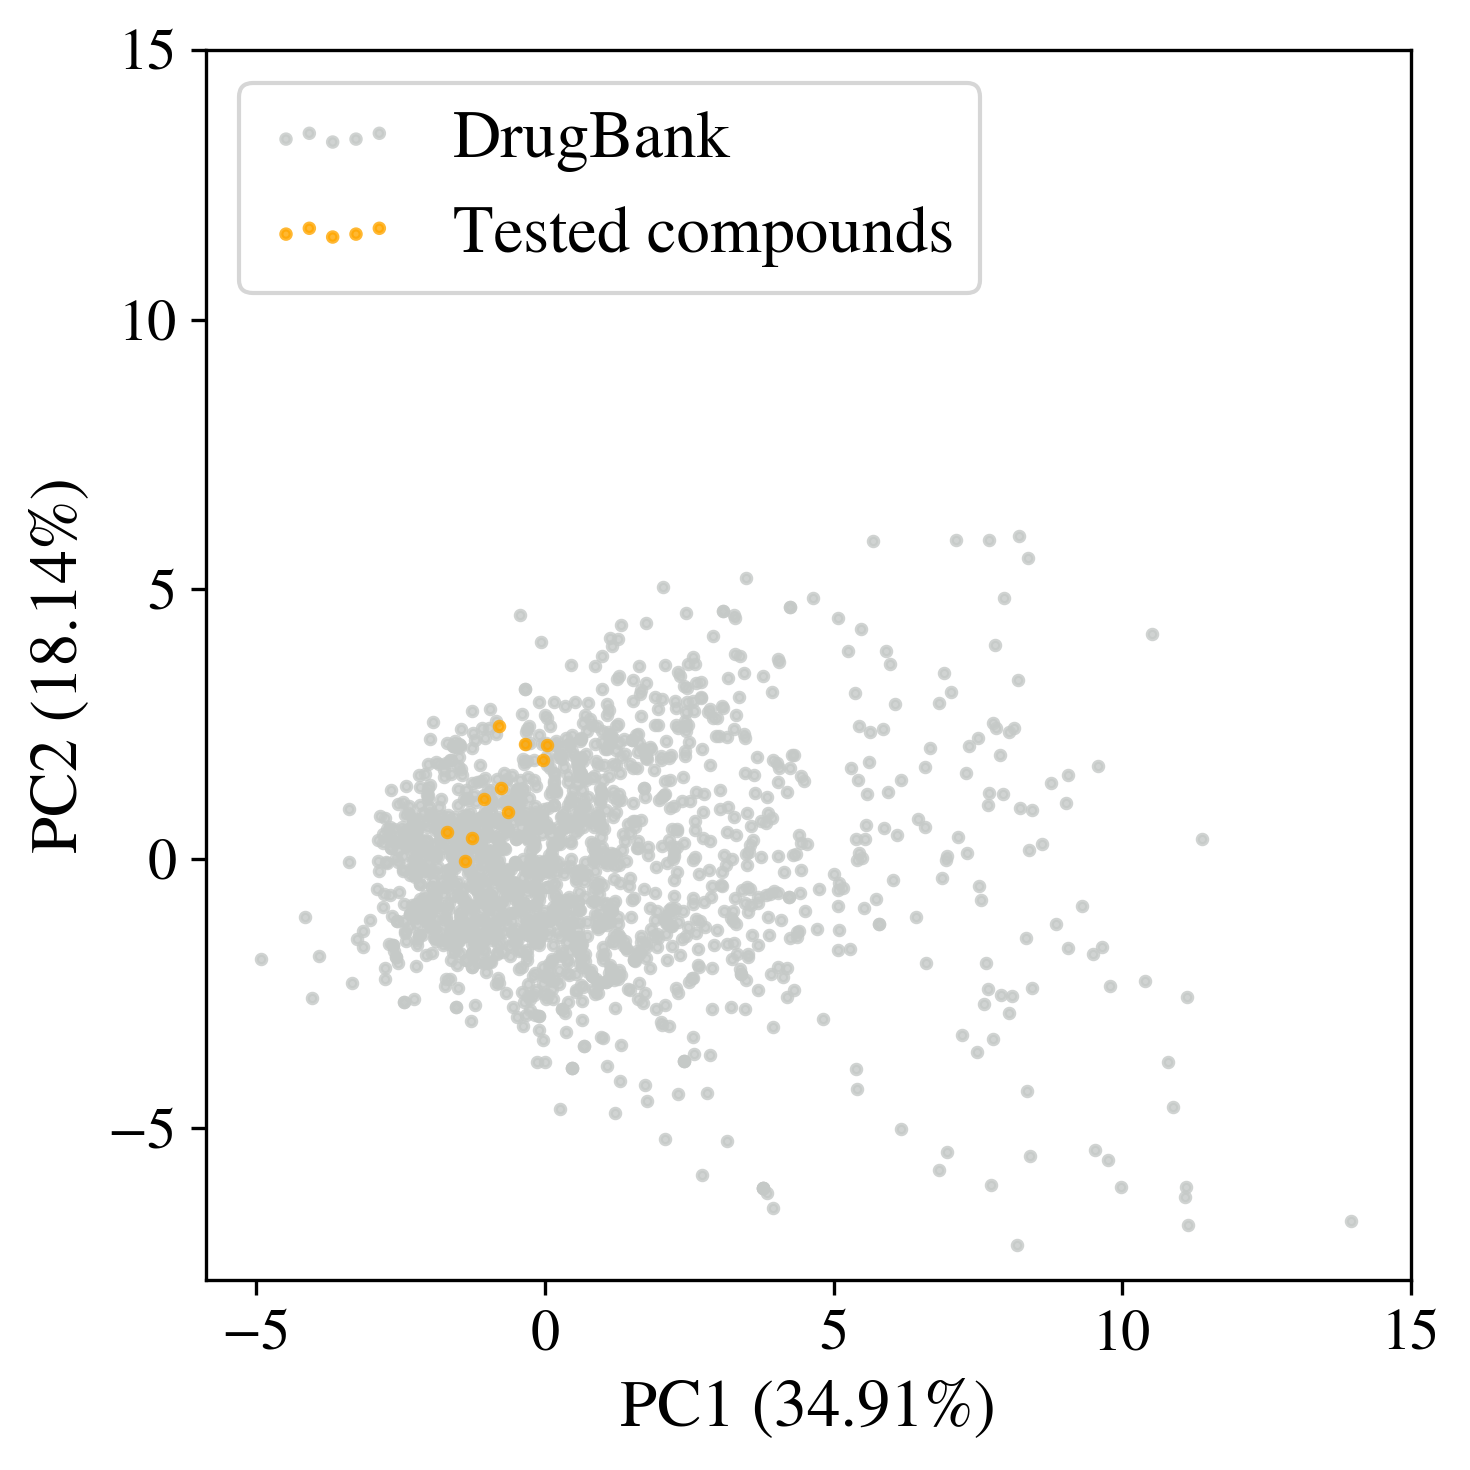

In [37]:
#tested compounds
databases = ['DrugBank', 'Tested compounds']
colors =  ['#c5c9c7', '#ffa600']

plot_pca(pcaDF,variance,databases,colors)

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt
import numpy as np


# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


[0.13580246913580246, 0.25806451612903225, 0.2857142857142857, 0.3508771929824561, 0.5306122448979592, 0.36363636363636365, 0.41818181818181815, 0.2153846153846154, 0.39622641509433965, 0.5084745762711864, 0.2571428571428571, 0.24444444444444444, 0.25675675675675674, 0.25333333333333335, 0.21052631578947367, 0.22413793103448276, 0.20833333333333334, 0.2647058823529412, 0.39622641509433965, 0.22058823529411764, 0.2631578947368421, 0.2033898305084746, 0.23170731707317074, 0.2777777777777778, 0.2857142857142857, 0.39285714285714285, 0.2916666666666667, 0.28, 0.3114754098360656, 0.3, 0.39285714285714285, 0.36, 0.21212121212121213, 0.41818181818181815, 0.5454545454545454, 0.3620689655172414, 0.29508196721311475, 0.3898305084745763, 0.19230769230769232, 0.24561403508771928, 0.5681818181818182, 0.16417910447761194, 0.39622641509433965, 0.2542372881355932, 0.2711864406779661, 0.46938775510204084, 0.3333333333333333, 0.21333333333333335, 0.26865671641791045, 0.2714285714285714, 0.33333333333333

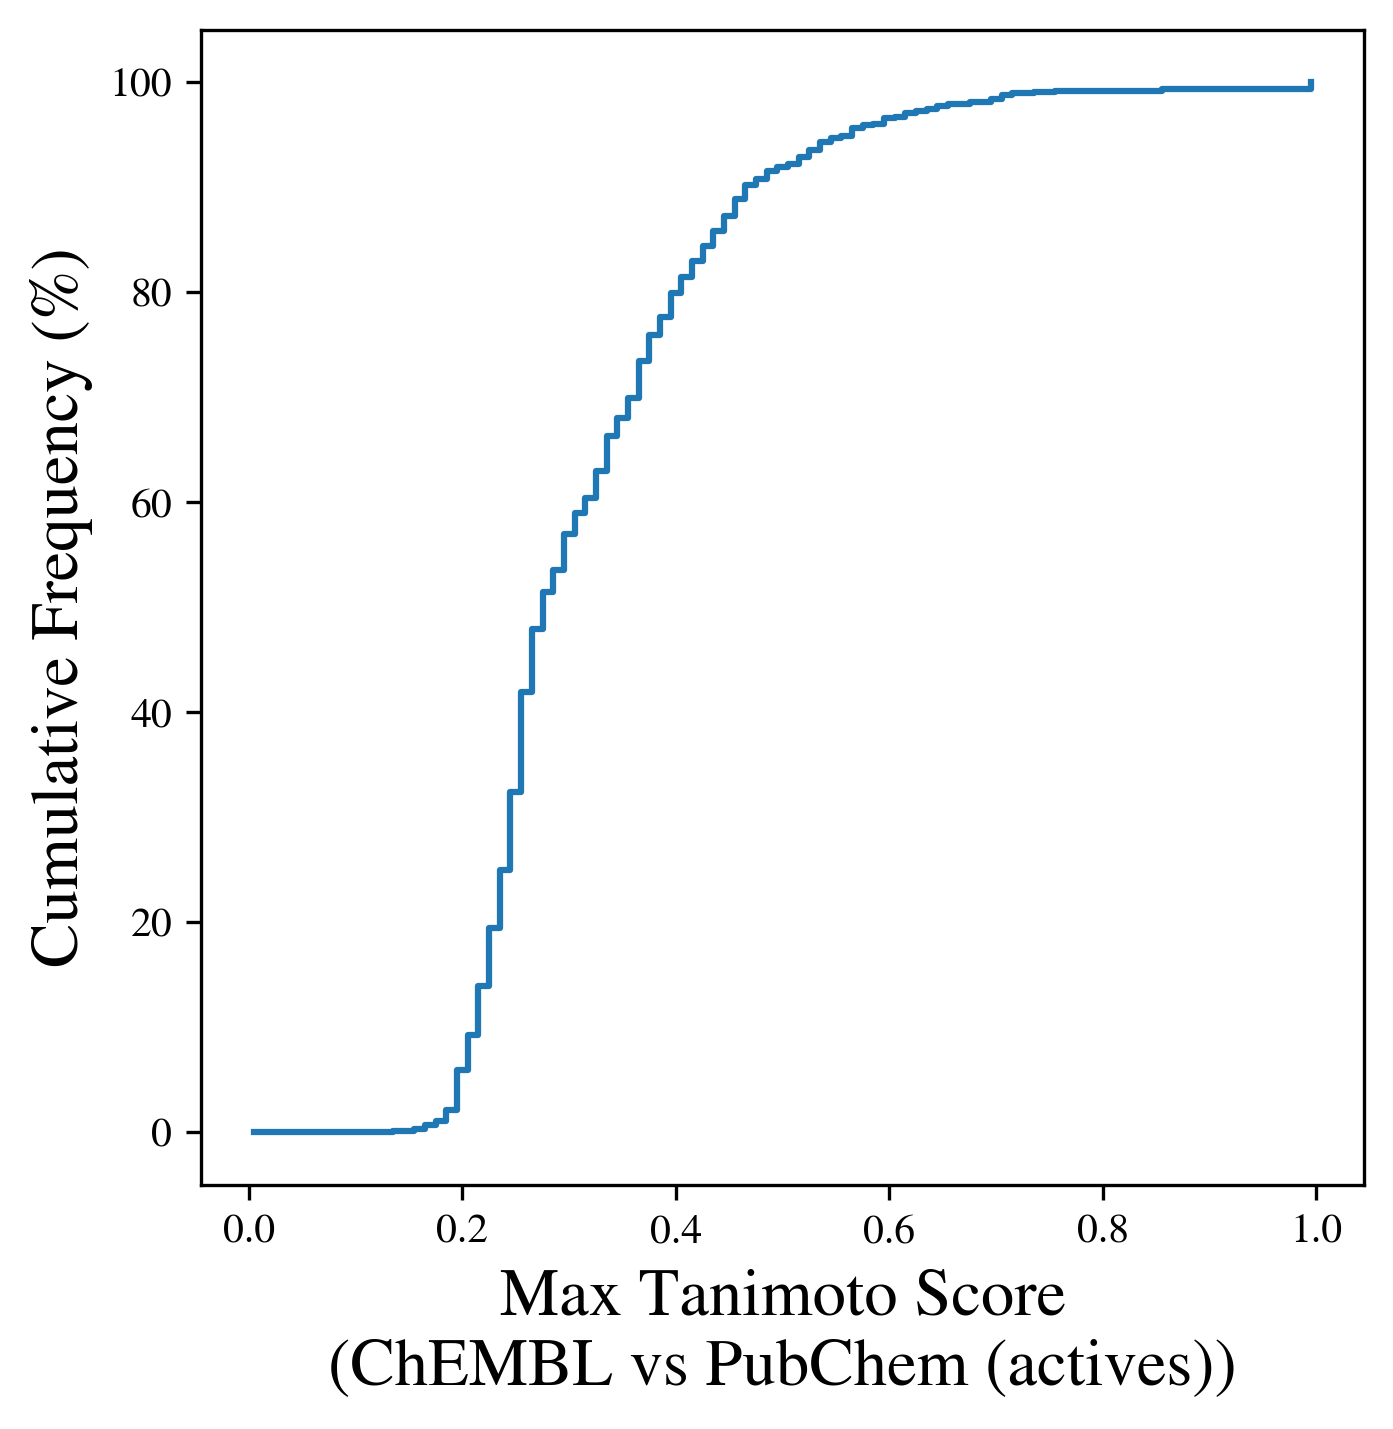

<Figure size 1500x1500 with 0 Axes>

In [39]:

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score\n(ChEMBL vs PubChem (actives))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.2909090909090909, 0.3064516129032258, 0.26785714285714285, 0.3188405797101449, 0.3194444444444444, 0.2830188679245283, 0.2972972972972973, 0.4727272727272727, 0.37681159420289856, 0.32941176470588235, 0.29310344827586204, 1.0, 0.2727272727272727, 0.3023255813953488, 0.3333333333333333, 0.288135593220339, 0.3, 0.4, 0.2631578947368421, 0.37349397590361444, 0.265625, 0.30158730158730157, 0.5769230769230769, 0.35, 0.5, 0.23529411764705882, 0.35064935064935066, 0.23333333333333334, 1.0, 0.2857142857142857, 0.3076923076923077, 0.35555555555555557, 0.34375, 0.3333333333333333, 0.27058823529411763, 0.2898550724637681, 0.3409090909090909, 0.21333333333333335, 0.28846153846153844, 0.23728813559322035, 0.37333333333333335, 0.3508771929824561, 0.23170731707317074, 0.5405405405405406, 0.2653061224489796, 0.3269230769230769, 0.375, 0.3013698630136986, 0.3111111111111111, 0.25862068965517243, 0.35, 0.21428571428571427, 0.24390243902439024, 0.24193548387096775, 0.5686274509803921, 0.444444444444444

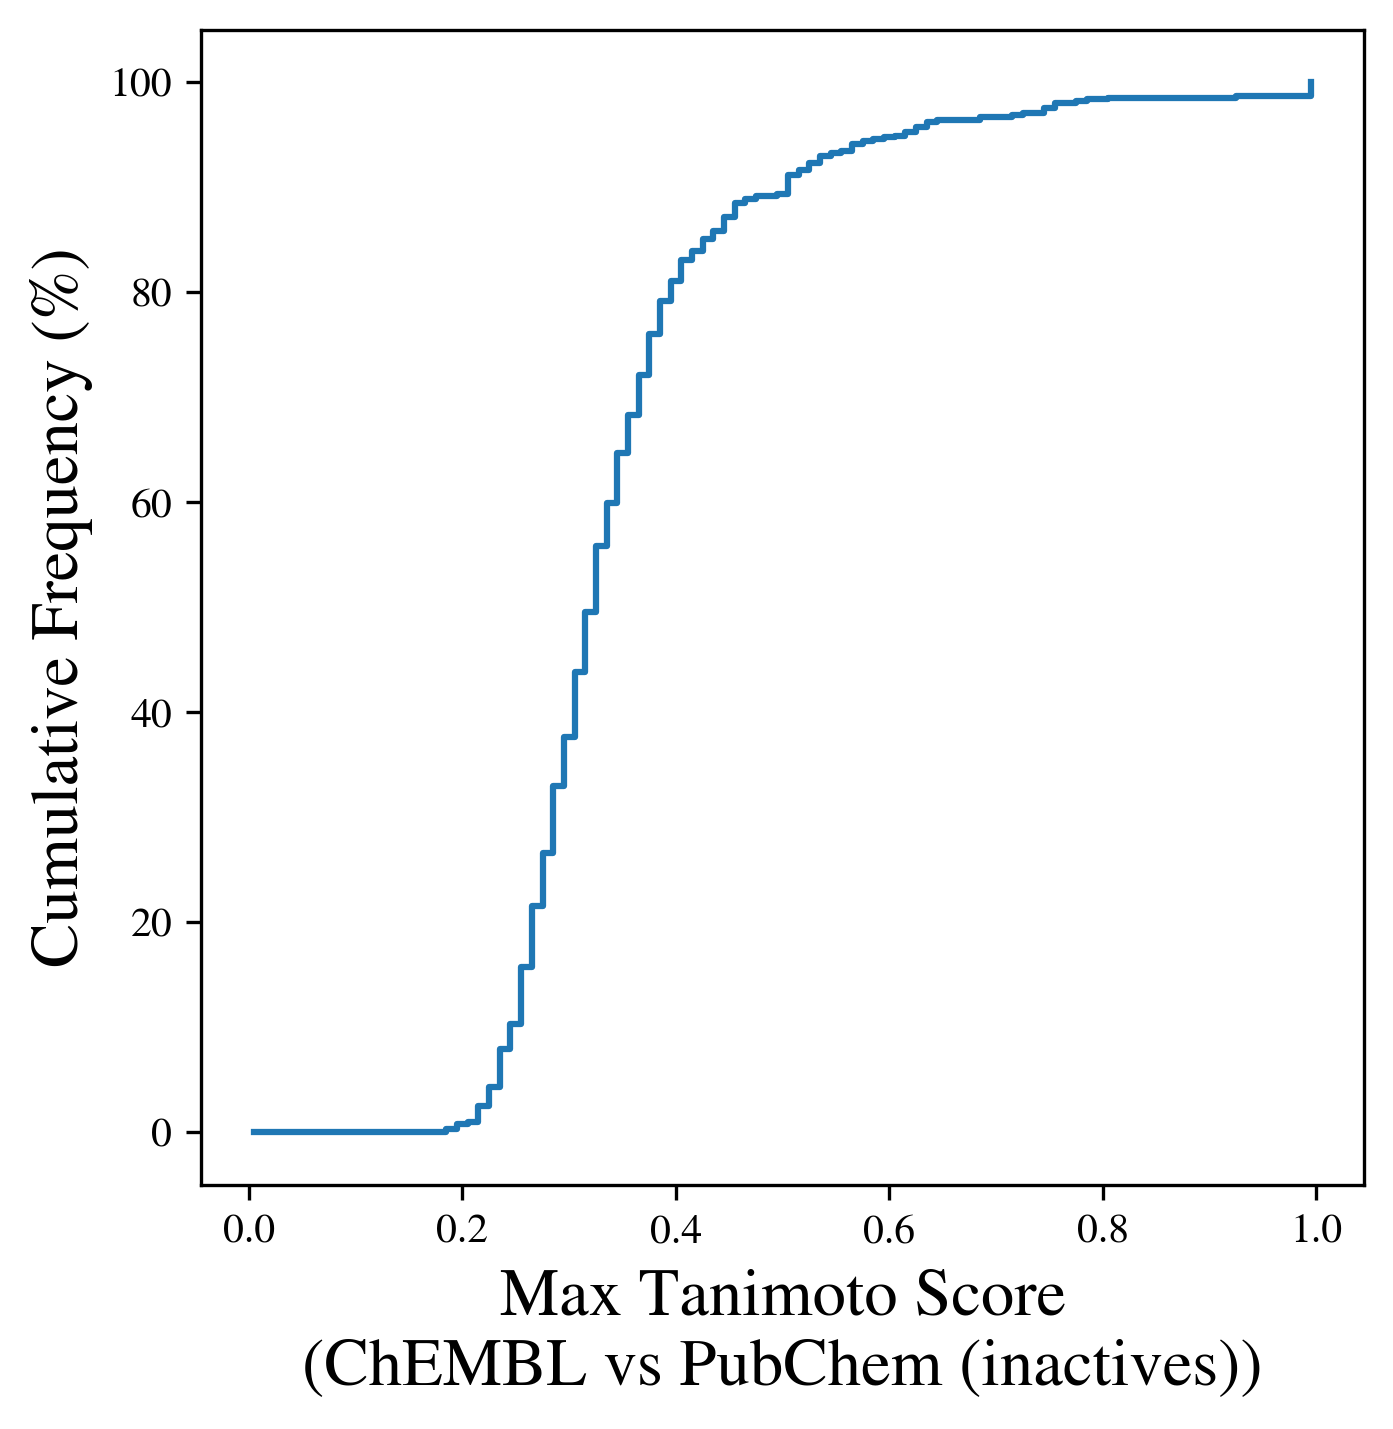

<Figure size 1500x1500 with 0 Axes>

In [40]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score\n(ChEMBL vs PubChem (inactives))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.5454545454545454, 0.5, 0.3387096774193548, 0.7169811320754716, 0.3382352941176471, 0.39344262295081966, 0.6444444444444445, 0.725, 0.5957446808510638, 0.6428571428571429, 0.5147058823529411, 0.5652173913043478, 0.48484848484848486, 0.5901639344262295, 0.6285714285714286, 0.6388888888888888, 0.6, 0.7115384615384616, 0.32857142857142857, 0.7446808510638298, 0.5094339622641509, 0.64, 0.32, 0.2786885245901639, 0.3076923076923077, 0.3333333333333333, 0.48484848484848486, 0.5230769230769231, 0.4444444444444444, 0.45588235294117646, 0.4057971014492754, 0.43636363636363634, 0.28169014084507044, 0.6825396825396826, 0.45161290322580644, 0.75, 0.5490196078431373, 0.6326530612244898, 0.6078431372549019, 0.3220338983050847, 0.5681818181818182, 0.27692307692307694, 0.36764705882352944, 0.8125, 0.8085106382978723, 0.40384615384615385, 0.5079365079365079, 0.5396825396825397, 0.6666666666666666, 0.7592592592592593, 0.42028985507246375, 0.8461538461538461, 0.8863636363636364, 0.8823529411764706, 0.68

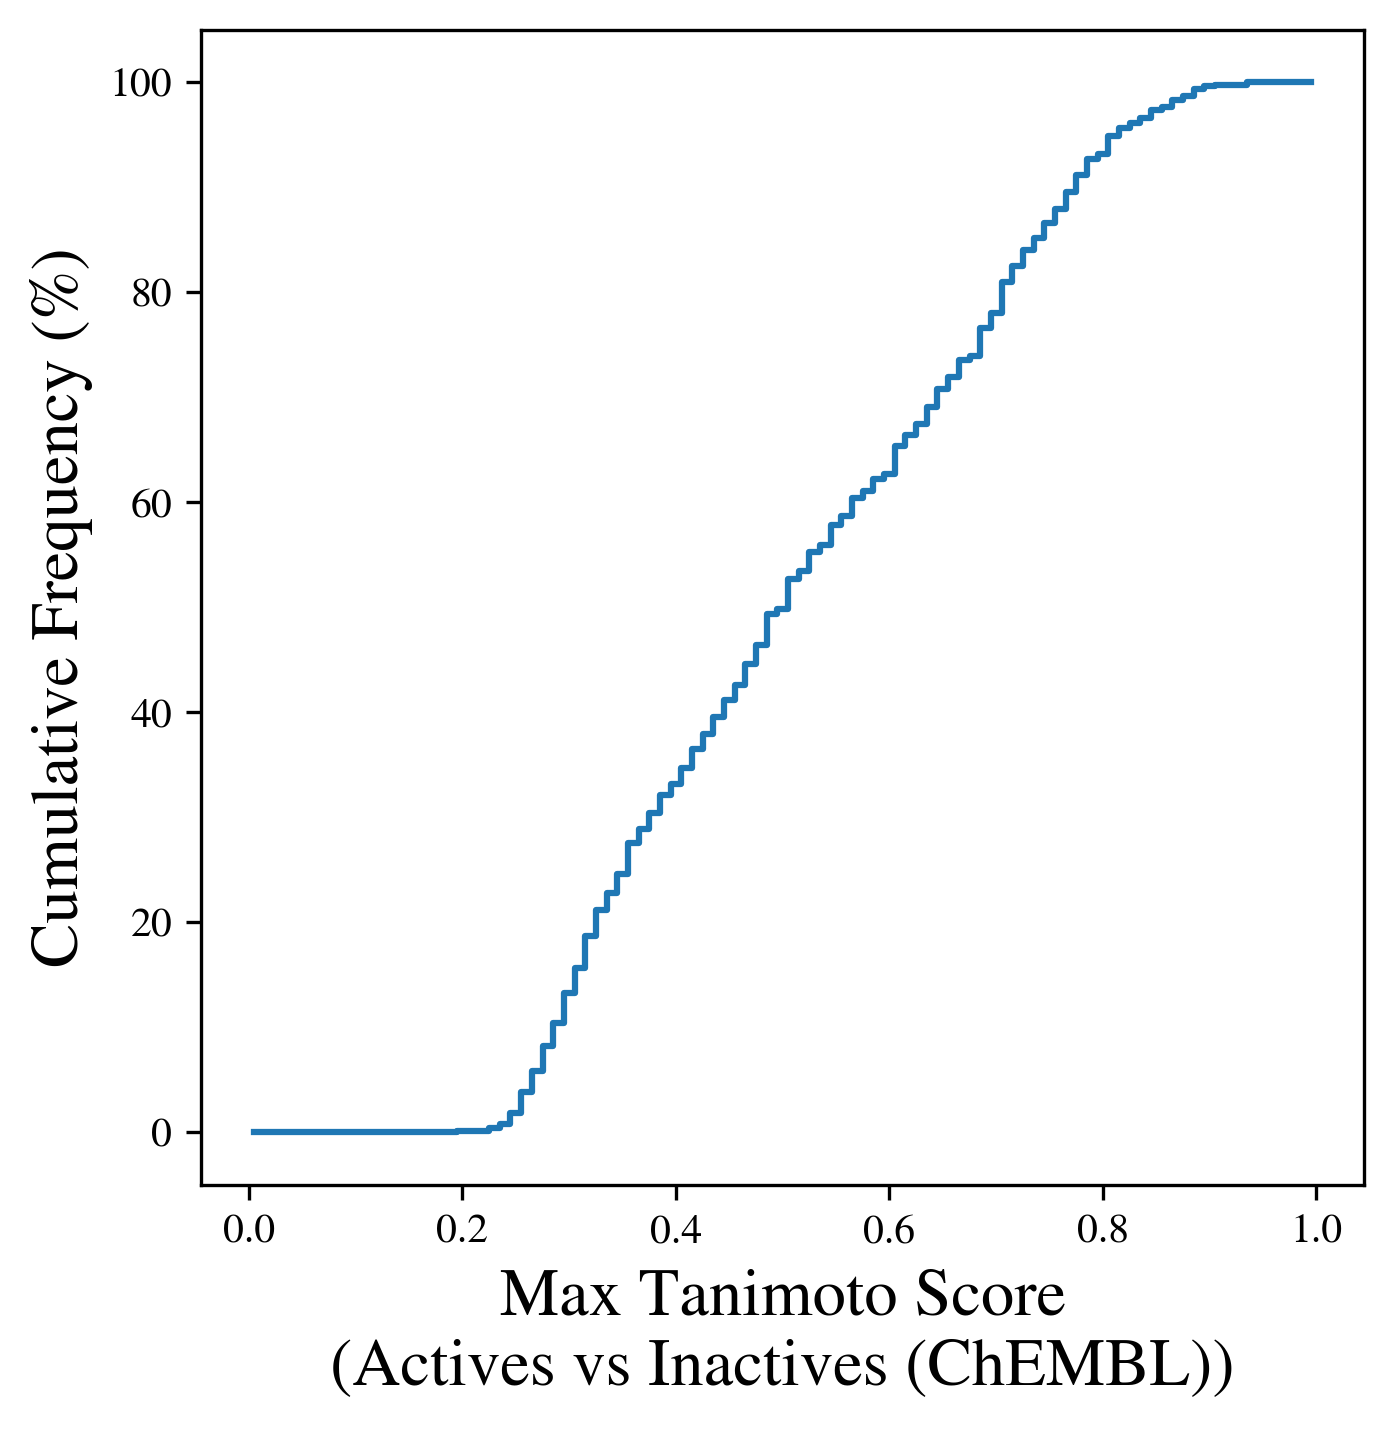

<Figure size 1500x1500 with 0 Axes>

In [41]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score\n(Actives vs Inactives (ChEMBL))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.6530612244897959, 0.23529411764705882, 0.5692307692307692, 0.3333333333333333, 0.21052631578947367, 0.559322033898305, 0.6181818181818182, 0.46875, 0.36538461538461536, 0.3783783783783784, 0.27906976744186046, 0.2727272727272727, 0.265625, 0.2903225806451613, 0.24489795918367346, 0.28846153846153844, 0.4838709677419355, 0.425, 0.7647058823529411, 0.8, 0.22916666666666666, 0.3, 0.29411764705882354, 0.2553191489361702, 0.4603174603174603, 0.41304347826086957, 0.36486486486486486, 0.24691358024691357, 0.37735849056603776, 0.27472527472527475, 0.4666666666666667, 0.7704918032786885, 0.5, 0.225, 0.46153846153846156, 0.42592592592592593, 0.26666666666666666, 0.5689655172413793, 0.2840909090909091, 0.19387755102040816, 0.3709677419354839, 0.40540540540540543, 0.4810126582278481, 0.26373626373626374, 0.42105263157894735, 0.5135135135135135, 0.30357142857142855, 0.42857142857142855, 0.3958333333333333, 0.27941176470588236, 0.37037037037037035, 0.5166666666666667, 0.23076923076923078, 0.41095

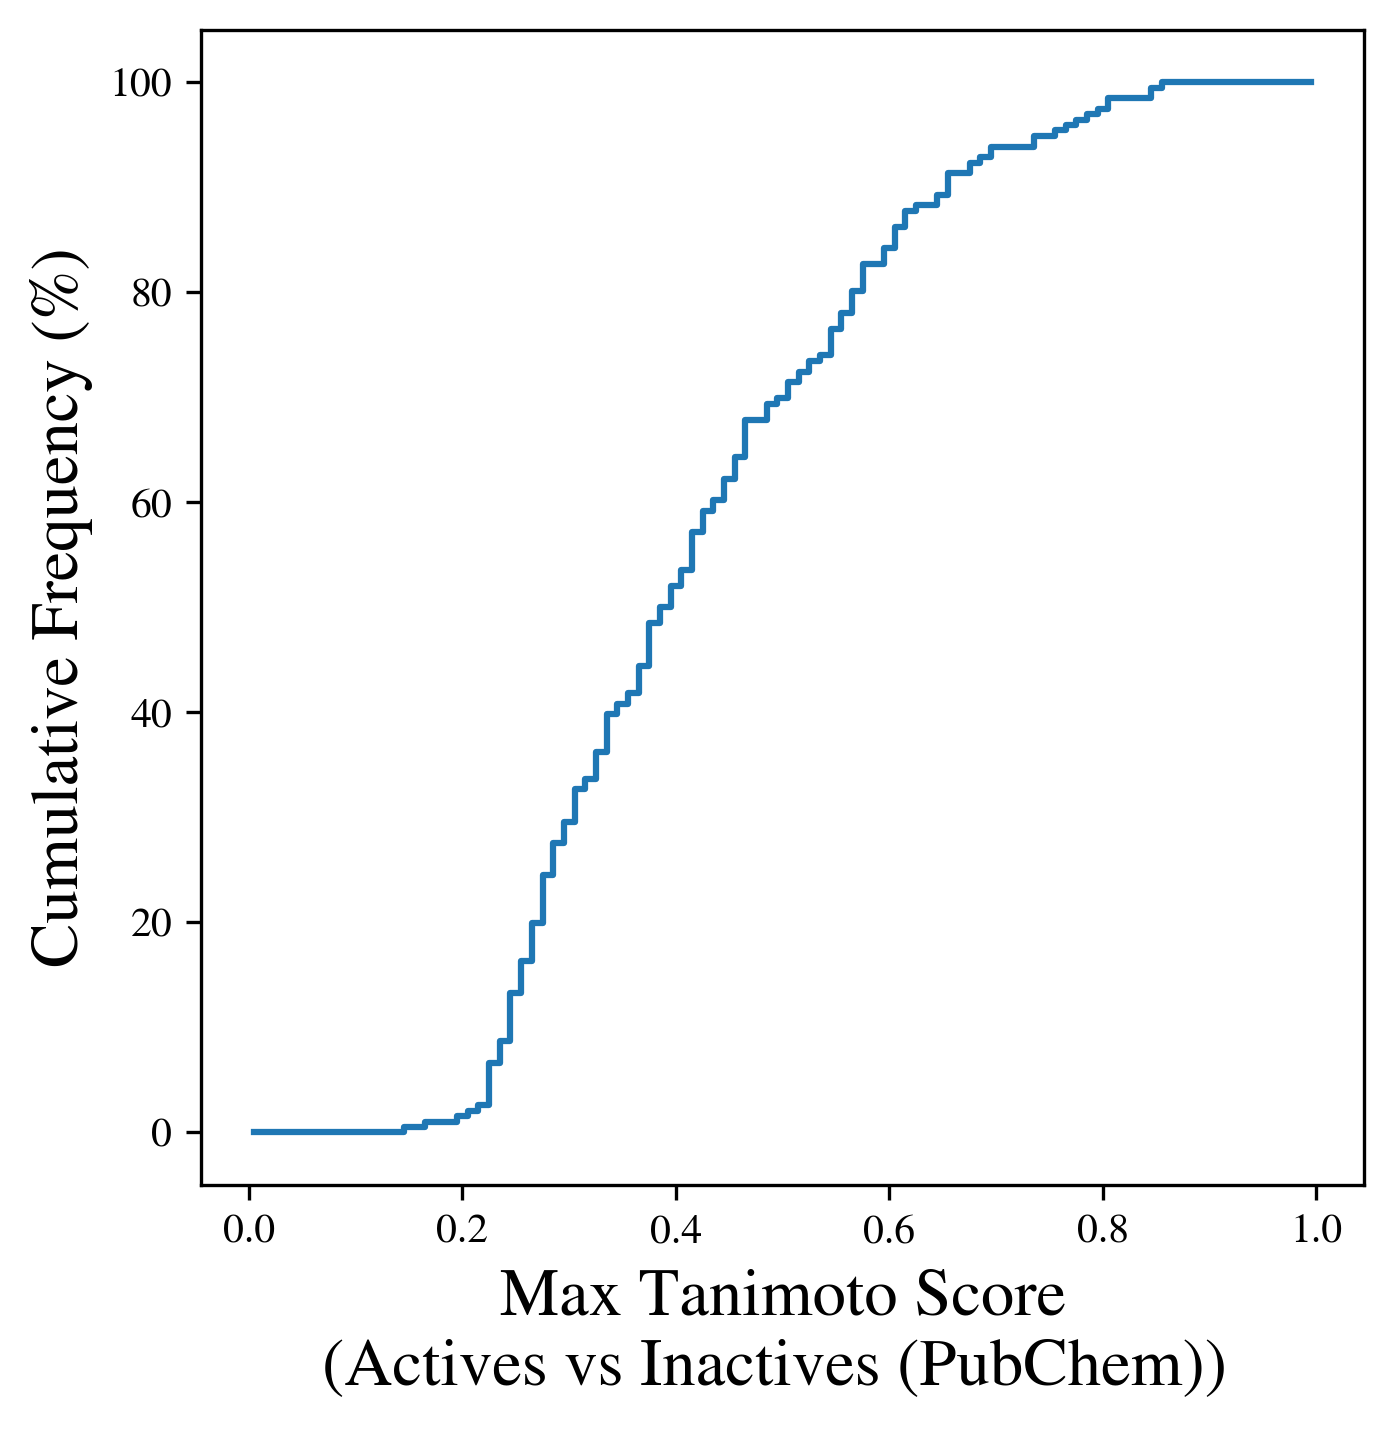

<Figure size 1500x1500 with 0 Axes>

In [42]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score\n(Actives vs Inactives (PubChem)) ', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

In [43]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors, Draw, rdMolDescriptors
from collections import Counter
import matplotlib.pyplot as plt


Number of active scaffolds: 313
Number of inactive scaffolds: 294


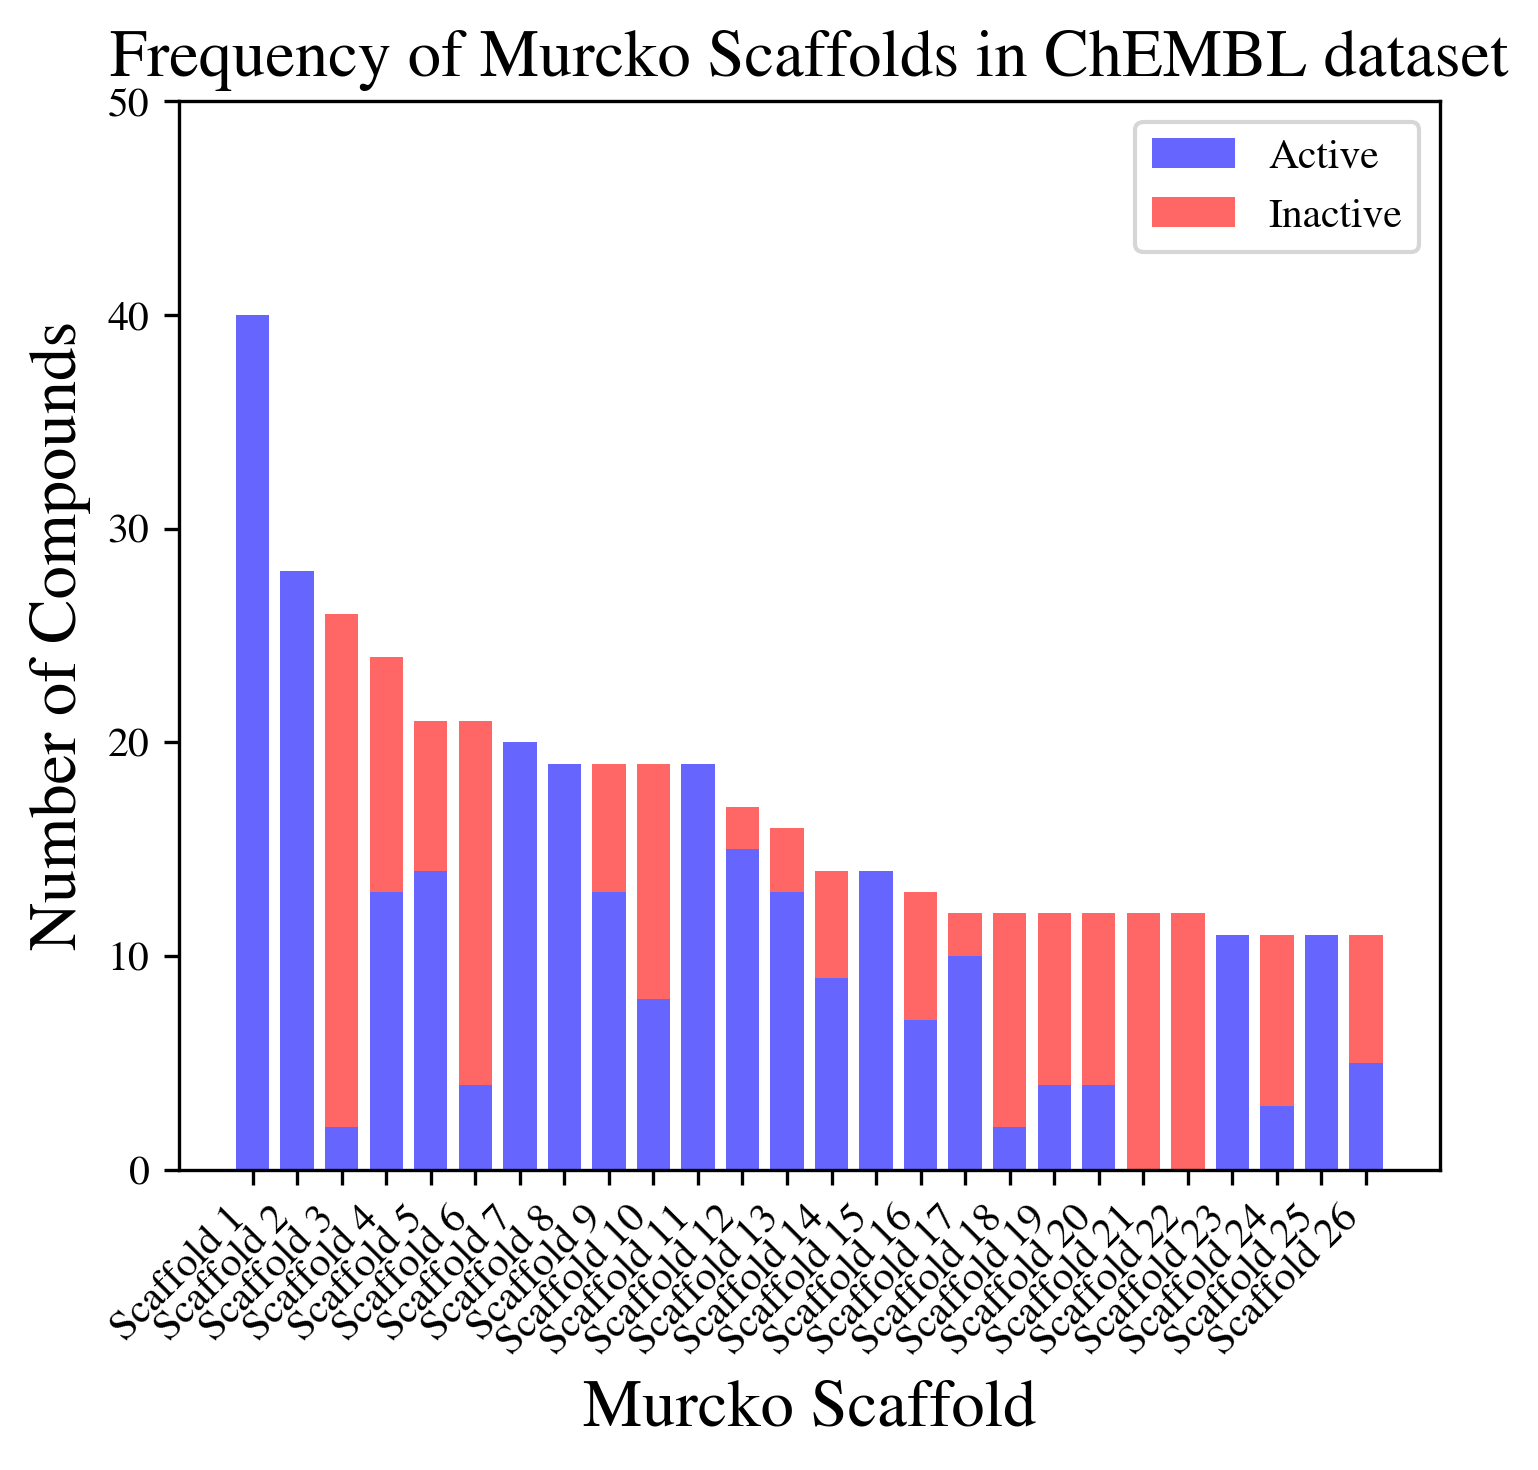

In [44]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds and counts
def generate_scaffolds_and_counts(mols):
    scaffolds_rdkitobject = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
    scaffolds = [Chem.MolToSmiles(m) for m in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds)

# Generate Murcko scaffolds and counts for active and inactive compounds
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
molB = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
active_scaffold_counts = generate_scaffolds_and_counts(molA)
inactive_scaffold_counts = generate_scaffolds_and_counts(molB)
                         
# print the number of active and inactive scaffolds from the datasets
print(f'Number of active scaffolds: {len(active_scaffold_counts)}')
print(f'Number of inactive scaffolds: {len(inactive_scaffold_counts)}')


# Combine and filter scaffold counts
combined_scaffold_counts = active_scaffold_counts + inactive_scaffold_counts
filtered_scaffold_counts = {scaffold: count for scaffold, count in combined_scaffold_counts.items() if count > 10}

# Sort scaffolds based on total occurrence
sorted_scaffolds = dict(sorted(filtered_scaffold_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
scaffolds = list(sorted_scaffolds.keys())
active_counts = [active_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]
inactive_counts = [inactive_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]

# Plotting

plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(5, 5), dpi=300)
bar_width = 0.75
index = range(len(scaffolds))

# Create stacked bars
plt.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
plt.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)
plt.ylim((0, 50))
plt.xlabel('Murcko Scaffold', fontsize=16)
plt.ylabel('Number of Compounds', fontsize=16)
plt.title('Frequency of Murcko Scaffolds in ChEMBL dataset', fontsize=16)
plt.xticks(index, [f'Scaffold {i+1}' for i in range(len(scaffolds))], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()



In [45]:

# Create a DataFrame for scaffolds with their active and inactive counts
scaffolds_data = {
    'Scaffold': list(filtered_scaffold_counts.keys()),
    'Active_Count': [active_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Inactive_Count': [inactive_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Total_Occurrence': [count for count in filtered_scaffold_counts.values()]
}
scaffolds_df = pd.DataFrame(scaffolds_data)

# Filter and sort DataFrame for visualization
scaffolds_df = scaffolds_df[scaffolds_df['Total_Occurrence'] > 10].sort_values(by='Total_Occurrence', ascending=False)

# Generate plot labels and assign them as a new column in the DataFrame
plot_labels = [f'Scaffold {i+1}' for i in range(len(scaffolds))]
scaffolds_df['Plot_Index'] = plot_labels
scaffolds_df.to_csv ('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/scaffolds_df_chembl.csv', index = False, header=True)
# Print the DataFrame of scaffolds to be plotted
scaffolds_df

,Scaffold,Active_Count,Inactive_Count,Total_Occurrence,Plot_Index
6,c1ccc(CN(c2ccccc2)n2cnnc2)cc1,40,0,40,Scaffold 1
7,c1ccc(-c2cccc(Cn3cncn3)c2)cc1,28,0,28,Scaffold 2
18,O=S(=O)(NCCc1c(C(c2ccccc2)c2[nH]c3ccccc3c2CCNS...,2,24,26,Scaffold 3
13,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,13,11,24,Scaffold 4
2,O=C1CCC2C1CCC1C3CCCC=C3CCC21,14,7,21,Scaffold 5
17,O=C1CC(c2ccccc2)Oc2ccccc21,4,17,21,Scaffold 6
10,O=S(=O)(c1ccccc1)N1CCCC(Cn2ccnc2)C1,20,0,20,Scaffold 7
5,O=c1cc(Cn2ccnc2)c2ccc(OCc3ccccc3)cc2o1,19,0,19,Scaffold 8
8,O=C1CCC2C(=CCC3C4CCC(=O)C4CCC23)C1,13,6,19,Scaffold 9
22,c1ccc(-n2c(Cn3ccnc3)cc3ccccc32)cc1,19,0,19,Scaffold 10


Number of active scaffolds: 146
Number of inactive scaffolds: 1166


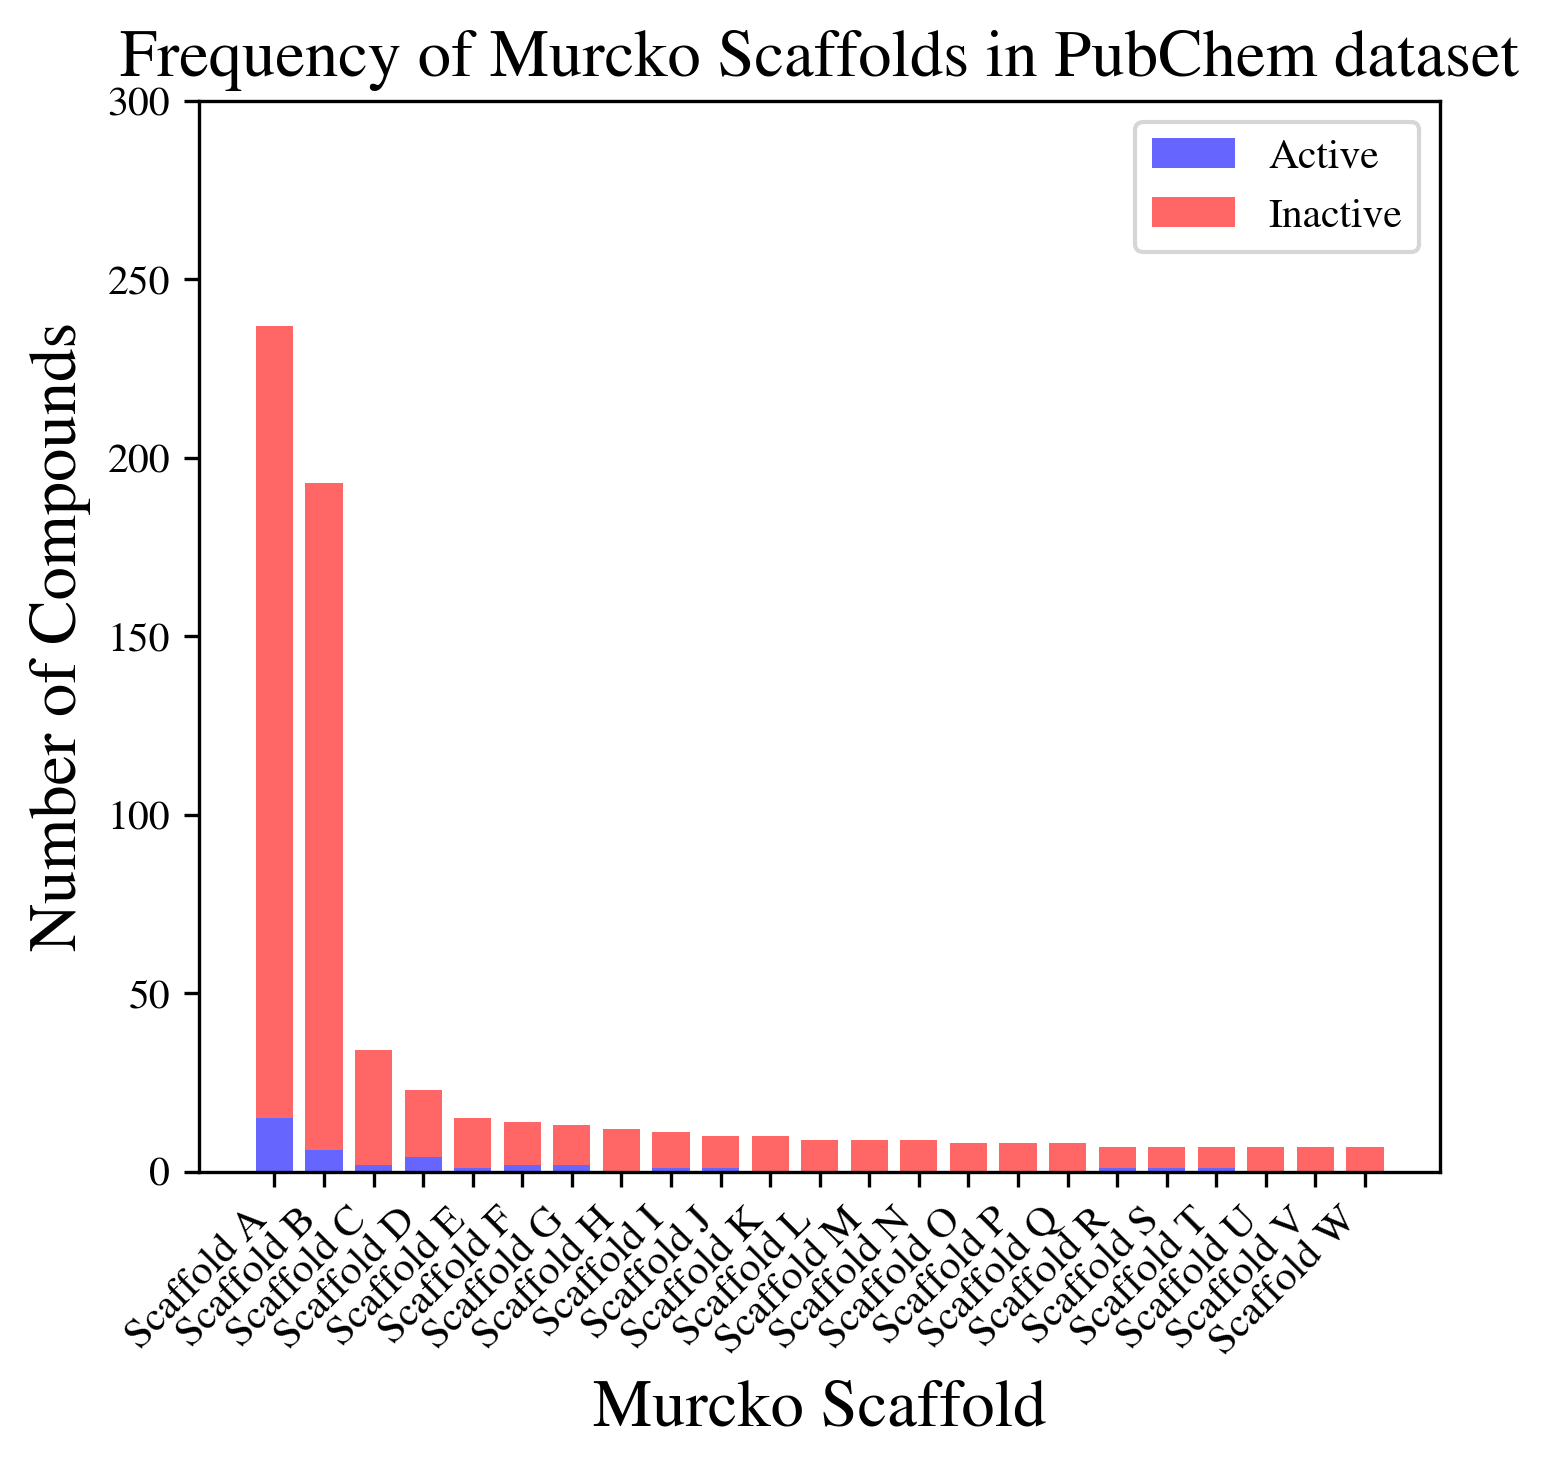

In [46]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds and counts
def generate_scaffolds_and_counts(mols):
    scaffolds_rdkitobject = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
    scaffolds = [Chem.MolToSmiles(m) for m in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds)

# Generate Murcko scaffolds and counts for active and inactive compounds
molA = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
active_scaffold_counts = generate_scaffolds_and_counts(molA)
inactive_scaffold_counts = generate_scaffolds_and_counts(molB)

# print the number of active and inactive scaffolds from the datasets
print(f'Number of active scaffolds: {len(active_scaffold_counts)}')
print(f'Number of inactive scaffolds: {len(inactive_scaffold_counts)}')

# Combine and filter scaffold counts
combined_scaffold_counts = active_scaffold_counts + inactive_scaffold_counts
filtered_scaffold_counts = {scaffold: count for scaffold, count in combined_scaffold_counts.items() if count > 6}

# Sort scaffolds based on total occurrence
sorted_scaffolds = dict(sorted(filtered_scaffold_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
scaffolds = list(sorted_scaffolds.keys())
active_counts = [active_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]
inactive_counts = [inactive_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]

# Plotting

plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(5, 5), dpi=300)
bar_width = 0.75
index = range(len(scaffolds))

import string

if len(scaffolds) <= 26:
    labels = ['Scaffold ' + letter for letter in string.ascii_uppercase[:len(scaffolds)]]
else:
    # Extend beyond 'Z' if necessary
    labels = ['Scaffold ' + string.ascii_uppercase[i % 26] + str(i // 26 + 1) for i in range(len(scaffolds))]



# Create stacked bars
plt.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
plt.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)
plt.ylim((0, 300))
plt.xlabel('Murcko Scaffold', fontsize=16)
plt.ylabel('Number of Compounds', fontsize=16)
plt.title('Frequency of Murcko Scaffolds in PubChem dataset', fontsize=16)
plt.xticks(index, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


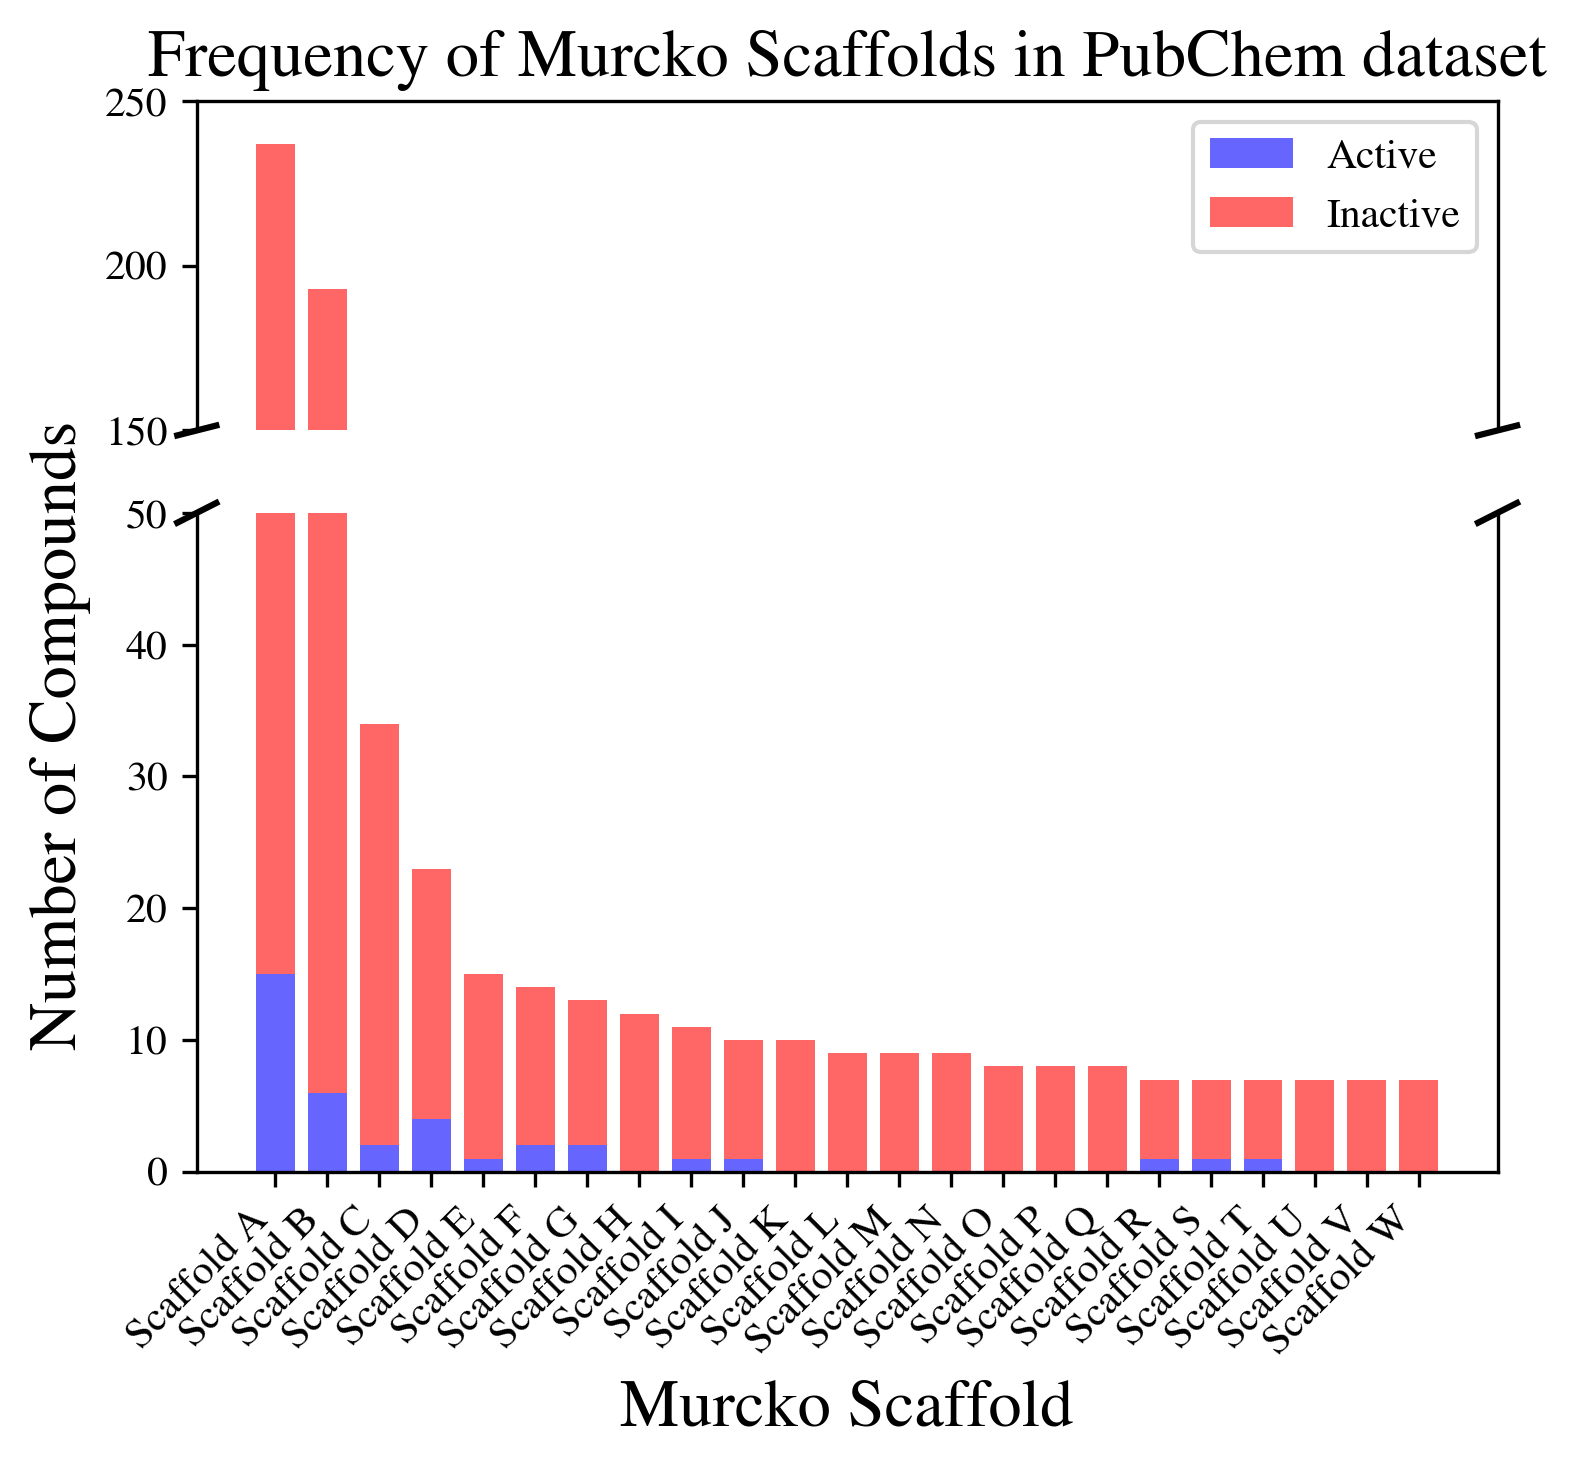

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import string

# Plotting with a broken Y-axis

plt.rcParams['font.family'] = 'STIXGeneral'
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 5), dpi = 300,
                               gridspec_kw={'height_ratios': [1, 2]})

bar_width = 0.75
index = np.arange(len(scaffolds))  # Using numpy for index array

# Labeling the scaffolds
if len(scaffolds) <= 26:
    labels = ['Scaffold ' + letter for letter in string.ascii_uppercase[:len(scaffolds)]]
else:
    # Extend beyond 'Z' if necessary
    labels = ['Scaffold ' + string.ascii_uppercase[i % 26] + str(i // 26 + 1) for i in range(len(scaffolds))]

# Create stacked bars
ax1.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
ax1.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)
ax2.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
ax2.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)

# Set Y-axis limits
ax1.set_ylim(150, 250)  # Upper part of the range (zoomed in)
ax2.set_ylim(0, 50)     # Lower part of the range

# Hide spines between the two axes

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(axis='x', which='both', length=0, labeltop=False)  # Don't show the X-axis labels on the top subplot
ax2.xaxis.tick_bottom()

# Add diagonal lines to represent the broken axis
d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Labels and titles
ax2.set_xlabel('Murcko Scaffold', fontsize=16)
fig.text(-0.02, 0.5, 'Number of Compounds', va='center', rotation='vertical', fontsize=16)
ax1.set_title('Frequency of Murcko Scaffolds in PubChem dataset', fontsize=16)

# Set X-axis ticks and labels
ax2.set_xticks(index)
ax2.set_xticklabels(labels, rotation=45, ha="right")

# Add legend
ax1.legend()
plt.tight_layout()
plt.show()


In [48]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds, counts, and molecule mappings
def generate_scaffolds_counts_and_mappings(mols):
    scaffold_to_molecules = defaultdict(list)
    scaffolds_rdkitobject = [(MurckoScaffold.GetScaffoldForMol(mol), mol) for mol in mols]
    
    for scaffold_rdkit, original_mol in scaffolds_rdkitobject:
        if scaffold_rdkit is not None:
            scaffold_smiles = Chem.MolToSmiles(scaffold_rdkit)
            original_smiles = Chem.MolToSmiles(original_mol)
            scaffold_to_molecules[scaffold_smiles].append(original_smiles)
    
    scaffolds = [Chem.MolToSmiles(m) for m, _ in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds), scaffold_to_molecules

# Adjusted for generating mappings
active_scaffold_counts, active_scaffold_to_molecules = generate_scaffolds_counts_and_mappings(molA)
inactive_scaffold_counts, inactive_scaffold_to_molecules = generate_scaffolds_counts_and_mappings(molB)

# Function to retrieve molecules for a specific scaffold
def get_molecules_for_scaffold(scaffold, active_mapping, inactive_mapping):
    active_molecules = active_mapping.get(scaffold, [])
    inactive_molecules = inactive_mapping.get(scaffold, [])
    return active_molecules, inactive_molecules

# Example usage for scaffold "B"
# Assuming 'Scaffold B' corresponds to a specific SMILES string in your 'labels' list
scaffold_b_smiles = ''  # You need to replace this with the actual SMILES
active_molecules_b, inactive_molecules_b = get_molecules_for_scaffold(scaffold_b_smiles, active_scaffold_to_molecules, inactive_scaffold_to_molecules)

print("Active molecules for Scaffold B:", active_molecules_b)
print("Inactive molecules for Scaffold B:", inactive_molecules_b)


Active molecules for Scaffold B: ['CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)CCCCCCCC', 'CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C', 'CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC', 'O=P(OC(CCl)CCl)(OC(CCl)CCl)OC(CCl)CCl', 'CCOP(=S)(OCC)OC(Cl)C(Cl)(Cl)Cl', 'CCCCCCCCCCCCCCCC[N+](C)(C)CC']
Inactive molecules for Scaffold B: ['CCCCCC=CCC=CCC=CCC=CCCCC(=O)NCC(=O)O', 'CCCC(C)(COC(N)=O)COC(=O)NC(C)C', 'O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CCN(CC(=O)O)CC(=O)O', 'O=C(O)CN(CCOCCOCCN(CC(=O)O)CC(=O)O)CC(=O)O', 'CCCCCCCCCCCCCCCC(=O)NCCO', 'CC(=O)NC(CC(=O)NC(CCC(=O)O)C(=O)O)C(=O)O', 'CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCN', 'COP(=O)(OC)C(O)C(Cl)(Cl)Cl', 'COC(C)(C)CCCC(C)C=CC=C(C)CC(=O)OC(C)C', 'CCCCCCCCCCCCOS(=O)(=O)O', 'CCCCCC=CCC=CCCCCCCCC(=O)O', 'CCC=CCC=CCC=CCCCCCCCC(=O)O', 'OC(CBr)C(O)C(O)C(O)CBr', 'CCCCCCCCC=CCCCCCCCC(=O)O', 'CCCCCCCC(=O)OCC(COC(=O)CCCCCCC)OC(=O)CCCCCCC', 'IC(I)I', 'CCCCCCCCCCCCCCCCCC(=O)O', 'CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC', 'CCCCCCCCCCCCCCCCCCOCC(CO[PH](=O)(=O)OCC[N+](C)(C)C)OC', 'CCCC

In [49]:
# Create a DataFrame for scaffolds with their active and inactive counts
scaffolds_data = {
    'Scaffold': list(filtered_scaffold_counts.keys()),
    'Active_Count': [active_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Inactive_Count': [inactive_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Total_Occurrence': [count for count in filtered_scaffold_counts.values()]
}
scaffolds_df = pd.DataFrame(scaffolds_data)

# Filter and sort DataFrame for visualization
scaffolds_df = scaffolds_df[scaffolds_df['Total_Occurrence'] > 6].sort_values(by='Total_Occurrence', ascending=False)

# Generate plot labels and assign them as a new column in the DataFrame
plot_labels = [f'Scaffold {letter}' for letter in string.ascii_uppercase[:len(scaffolds_df)]]
scaffolds_df['Plot_Index'] = plot_labels

# Print and save the DataFrame of scaffolds to be plotted
scaffolds_df
scaffolds_df.to_csv ('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/scaffolds_df_pubchem.csv', index = False, header=True)

In [50]:
scaffolds_df

,Scaffold,Active_Count,Inactive_Count,Total_Occurrence,Plot_Index
0,c1ccccc1,15,222,237,Scaffold A
4,,6,187,193,Scaffold B
8,c1ccc(Cc2ccccc2)cc1,2,32,34,Scaffold C
3,c1ccc(Oc2ccccc2)cc1,4,19,23,Scaffold D
9,c1ccc2ccccc2c1,1,14,15,Scaffold E
6,c1ccc(-c2ccccc2)cc1,2,12,14,Scaffold F
10,c1ccncc1,2,11,13,Scaffold G
15,O=C(c1ccccc1)c1ccccc1,0,12,12,Scaffold H
1,c1ccc2c(c1)CCC1C2CCC2CCCC21,1,10,11,Scaffold I
19,c1ccc(Nc2ccccc2)cc1,0,10,10,Scaffold J
